# Group 1: Final Project Assignment (Part 1, Part 2) 
### Exploration of subset of Data from the Framingham heart study
### Amanda Ehui, Tonya Jagneaux, Sabrina Johnson  


# Part 1 Data Exploration and Wrangling, Creation of Training and Test Data Sets


This heart disease data set will be examined to develop a prediction model for coronary heart diseae within a ten year time interval.  Following exploration, data wrangling will be used to address missing values and drop non contributing predictor variables.  Finally, prediction models will be built to determine the best fit.  Best fit will be defined by addressing the goal, which is to differentiate between those who have or do not have evidence of heart disease within ten years of presentation.  The outcome variable is this data set is binary, TenYearCHD (0/1).

### Import Packages

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from scipy import stats
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline

### Read heart disease file for analysis

In [2]:
#From Tonya's Laptop
#df = pd.read_csv(r"C:\Users\tjagn\Documents\Projects\heartdisease.csv")
#From Sabrina's Laptop
#df = pd.read_csv(r"C:\Users\Brina\Documents\LSU\ISDS 7070\Project Files\Module 4\Assignment Files\heartdisease.csv")

#Read from GitHub

url = 'https://raw.githubusercontent.com/tjagneaux/Group1-Python7070/main/heartdisease.csv'
df = pd.read_csv(url)


### Data screen and column evaluation

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [5]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Data types and summary statistics

With evaluation of the dataset info command, missing values are noted.  All data types were either integer or float.  The outcome variable is TenYearCHD and it is binary indicated 0 for no disease and 1 for disease detected.

In [6]:
#Assess/Verification for missing variables with non-null counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### Descriptive Statistics

The data demonstrated a majority female population, with an average age of 50. The average education level was two. Nearly 50% were current smokers, with an average smoking rate of 9 cigarettes per day. Most patients were not listed to have blood pressure medications. Very few patients had prior strokes or diabetes. Hypertension was present in nearly a third of patients. There were wide ranges for cholesterol, blood pressure, BMI, heart rate, and glucose, with all categories having high/low values extremes. Finally, as an outcome variable, coronary heart disease was present in 15% of the patients listed. 

In [7]:
#descriptive statistics-prior to correction for missing values
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Visualize distribution of data with histograms and boxplots

Histograms and boxplots of continuous variables were viewed to assess distribution and also to determine best methods for imputation of missing variables.  Several variables will demonstrate outliers and after review, the decision was made to leave them in place. There may be value in these outliers to recognizing extremes of physiologic characteristics and their relationshp to outcomes.

## Histograms

#### Histogram of CigsPerDay--right skewed

Text(0.5, 1.0, 'Histogram CigsPerDay')

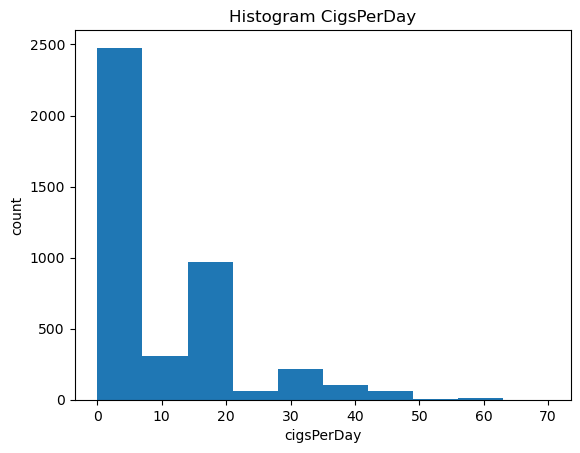

In [8]:
#Histogram of CigsPerDay
plt.hist(df["cigsPerDay"])
plt.xlabel("cigsPerDay")
plt.ylabel("count")
plt.title("Histogram CigsPerDay")

#### Interpretation of totChol:  relatively normal distribution

Text(0.5, 1.0, 'Histogram Total Cholesterol')

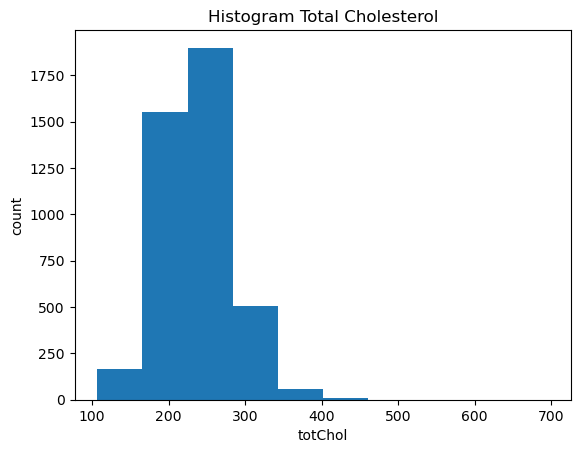

In [9]:
#Histogram of totChol
plt.hist(df["totChol"])
plt.xlabel("totChol")
plt.ylabel("count")
plt.title("Histogram Total Cholesterol")

#### Interpretation of BMI:  relatively normal distribution, mild asymetry with slight right skew

Text(0.5, 1.0, 'Histogram BMI')

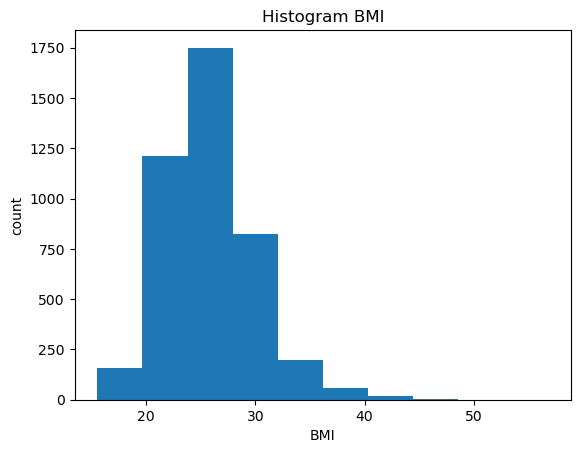

In [10]:
#Histogram of BMI
plt.hist(df["BMI"])
plt.xlabel("BMI")
plt.ylabel("count")
plt.title("Histogram BMI")

#### Interpretation of heartRate:  relatively normal distribution

Text(0.5, 1.0, 'Histogram Heart Rate')

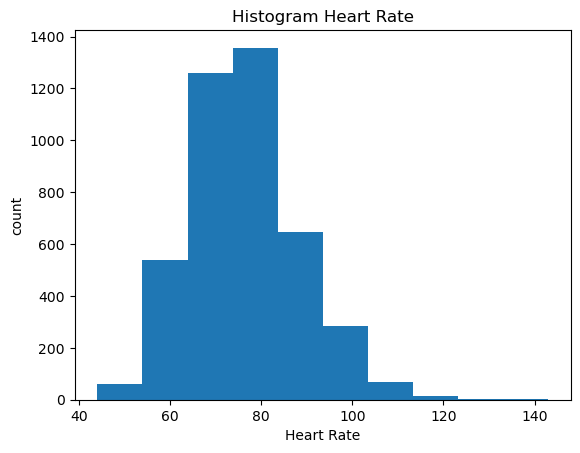

In [11]:
#Histogram of heartRate
plt.hist(df["heartRate"])
plt.xlabel("Heart Rate")
plt.ylabel("count")
plt.title("Histogram Heart Rate")

#### Interpretation of glucose:  Right skewed with noted outliers in high ranges

Text(0.5, 1.0, 'Histogram Glucose')

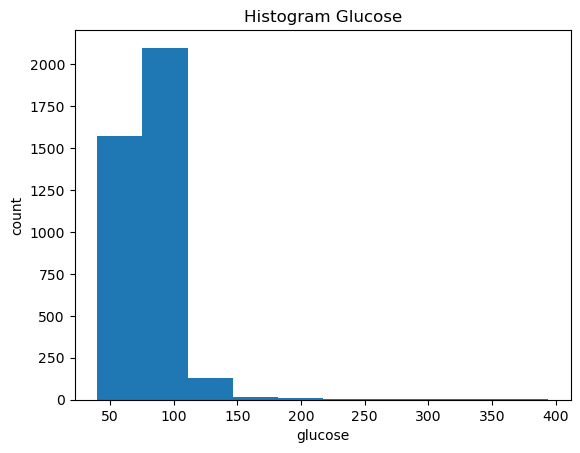

In [12]:
plt.hist(df["glucose"])
plt.xlabel("glucose")
plt.ylabel("count")
plt.title("Histogram Glucose")

#### Interpretation of Age:  slight bimodal distribution

Text(0.5, 1.0, 'Histogram Age')

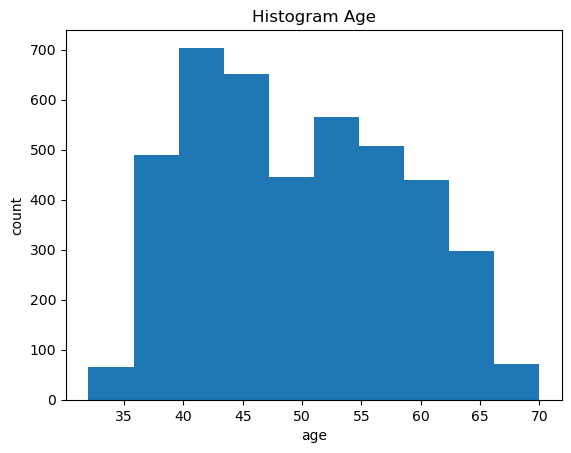

In [13]:
plt.hist(df["age"])
plt.xlabel("age")
plt.ylabel("count")
plt.title("Histogram Age")

#### Interpretation of Systolic BP:  relatively normal distribution, slight right skew

Text(0.5, 1.0, 'Histogram Systolic BP')

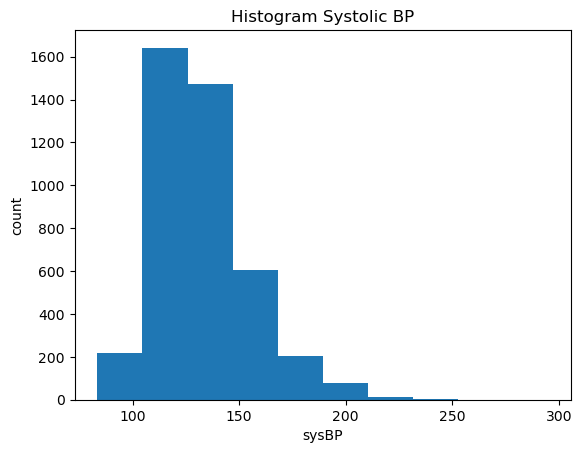

In [14]:
plt.hist(df["sysBP"])
plt.xlabel("sysBP")
plt.ylabel("count")
plt.title("Histogram Systolic BP")

#### Interpretation of diastolic BP:  relatively normal distribution, slight right skew

Text(0.5, 1.0, 'Histogram Diastolic BP')

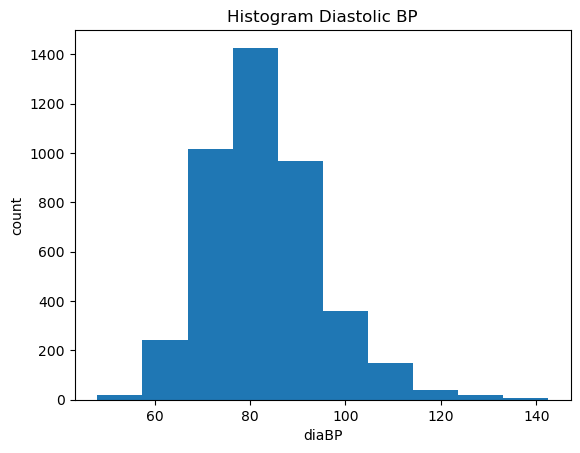

In [15]:
plt.hist(df["diaBP"])
plt.xlabel("diaBP")
plt.ylabel("count")
plt.title("Histogram Diastolic BP")

## Boxplots

Interpretation of Glucose Boxplot:  significant number of values extending beyond the 75% range

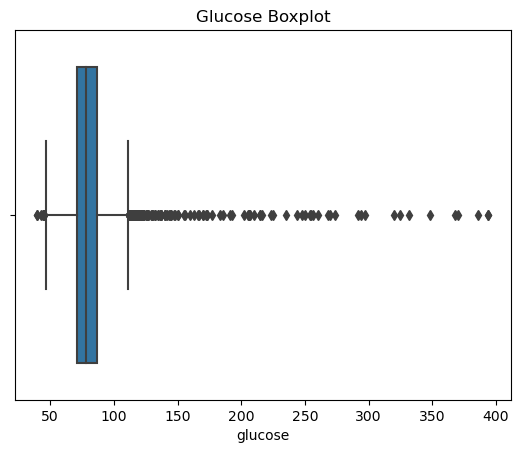

In [16]:
#Boxplot- glucose
sns.boxplot(x=df['glucose'])
plt.title("Glucose Boxplot")
plt.show()

Interpretation of Systolic BP Boxplot: tight collection of values extending beyond the 75% range between 180-220, one extreme outlier

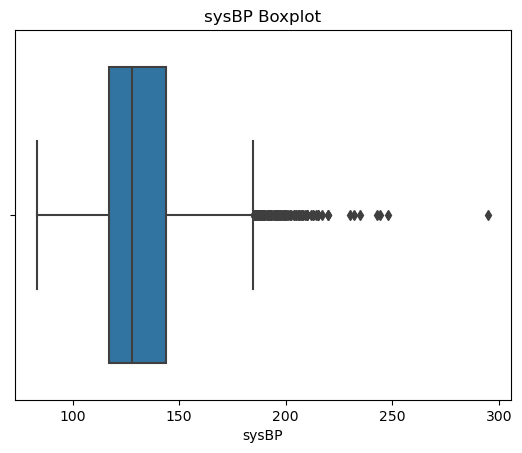

In [17]:
#Boxplot systolic BP
sns.boxplot(x=df['sysBP'])
plt.title("sysBP Boxplot")
plt.show()

Interpretation of Diastolic BP Boxplot: small number of values below 25% range, collection of values
    extending beyond the 75% range between 110-150

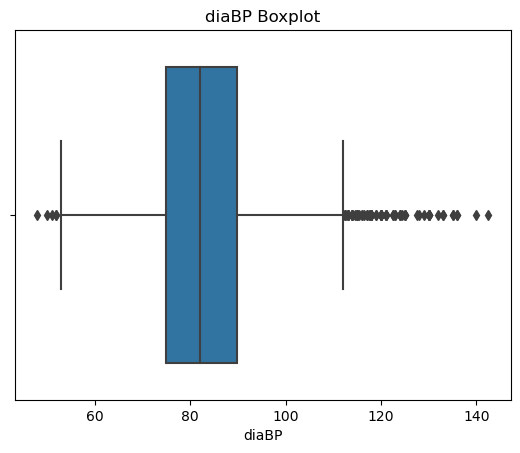

In [18]:
#Boxplot diastolic BP
sns.boxplot(x=df['diaBP'])
plt.title("diaBP Boxplot")
plt.show()

Interpretation of BMI Boxplot: tight collection of values extending beyond the 75% range between 35-45, 2 extreme outliers

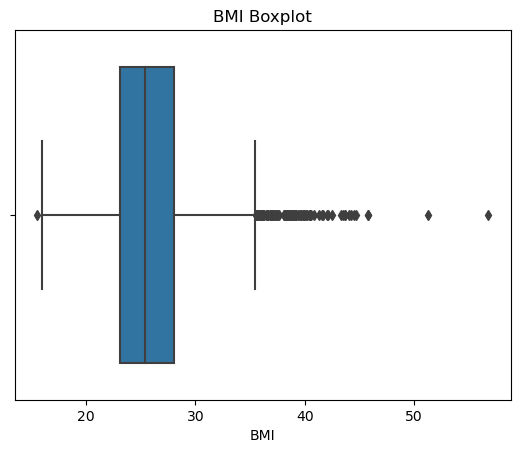

In [19]:
#Boxplot BMI
sns.boxplot(x=df['BMI'])
plt.title("BMI Boxplot")
plt.show()

Interpretation of totChol Boxplot: tight collection of values extending beyond the 75% range between 350-450, few extreme outliers in very high range

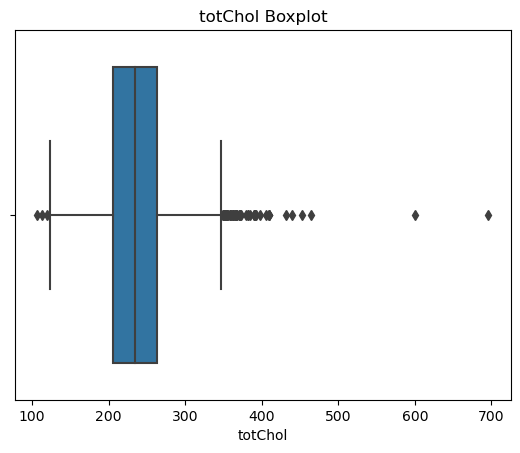

In [20]:
#Boxplot totChol
sns.boxplot(x=df['totChol'])
plt.title("totChol Boxplot")
plt.show()

Interpretation of Age Boxplot: majority of values distributed around median, no outliers noted

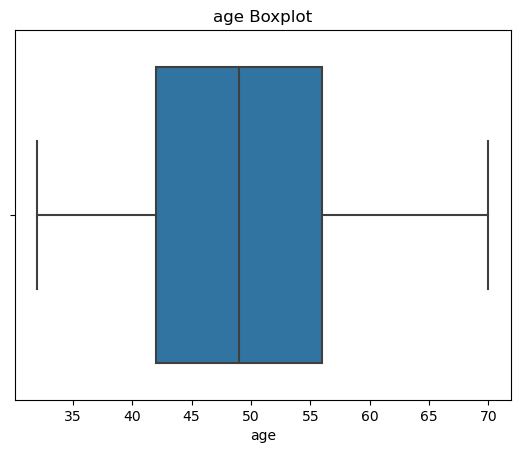

In [21]:
#Boxplot Age
sns.boxplot(x=df['age'])
plt.title("age Boxplot")
plt.show()

Interpretation of cigsPerDay Boxplot: Values distributed to lower range with two extreme outliers, this is primarily attributed to large number of non smokers categorized as a 0.  Two extreme outliers.

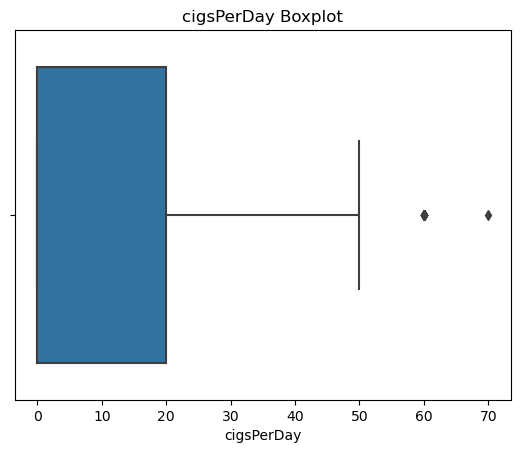

In [22]:
#Boxplot of cigsPerday
sns.boxplot(x=df['cigsPerDay'])
plt.title("cigsPerDay Boxplot")
plt.show()

Interpretation of heartRate Boxplot: distribution around the median, small collection of outliers in high range, few outliers in low range

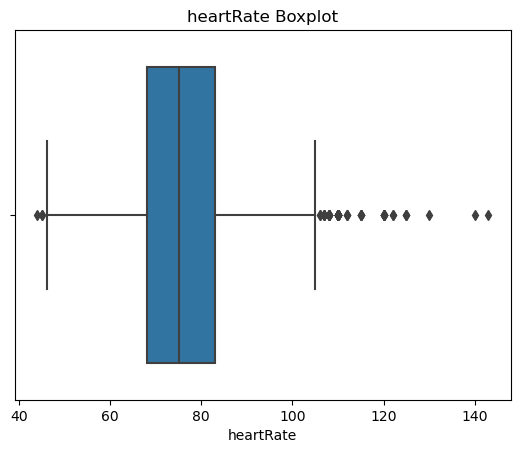

In [23]:
#Boxplot of heartRate
sns.boxplot(x=df['heartRate'])
plt.title("heartRate Boxplot")
plt.show()

## Missing Data and Recoding
By assessment of original csv file, missing values are coded as "NA"  
Recode missing values to nan with Numpy

In [24]:
#assess for missing variables with non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


#### Recode "NA" to Not a Number (nan) with numpy

In [25]:
# Recode NA to nan
df.replace('NA', np.nan, inplace = True)

In [26]:
#confirm row 14- glucose
has_null = df.isnull()
has_null.head(20)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
#Reassess non null counts
df.info()
#same counts prior to null value reassignment

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### Calculate Measures of Central Tendency in Select Variables: Continuous with Missing Values
Will use for missing value imputation

#### Median

In [28]:
med_BMI = df['BMI'].median()
med_Gluc = df['glucose'].median()
med_Educ = df['education'].median()
med_totChol = df['totChol'].median()

print ('Median BMI =',med_BMI)
print('Median glucose =', med_Gluc)
print('Median education =', med_Educ)
print('Median Chol =', med_totChol)

Median BMI = 25.4
Median glucose = 78.0
Median education = 2.0
Median Chol = 234.0


#### Mean

In [29]:
mean_BMI = df['BMI'].mean()
mean_Gluc = df['glucose'].mean()
mean_Educ = df['education'].mean()
mean_totChol = df['totChol'].mean()
mean_hr = df['heartRate'].mean()

print ('Mean BMI =', mean_BMI)
print ('Mean Glucose =', mean_Gluc)
print ('Mean Education =', mean_Educ)
print ('Mean cholesterol =', mean_totChol)
print ('Mean HR =', mean_hr)

Mean BMI = 25.80200758473572
Mean Glucose = 81.96675324675324
Mean Education = 1.9789499153157513
Mean cholesterol = 236.72158548233045
Mean HR = 75.87892376681614


#### Mode

In [30]:
mode_cpd = df['cigsPerDay'].mode().values[0]
mode_BPmeds = df['BPMeds'].mode().values[0]

print ('mode BP Meds =', mode_BPmeds)
print ('mode Ciggs per Day =', mode_cpd)


mode BP Meds = 0.0
mode Ciggs per Day = 0.0


### Check Frequencies to interpret with mode

In [31]:
df['BPMeds'].value_counts()

0.0    4061
1.0     124
Name: BPMeds, dtype: int64

In [32]:
df['education'].value_counts()

1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64

In [33]:
df['cigsPerDay'].value_counts()

0.0     2144
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0       12
8.0       11
60.0      11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
45.0       3
13.0       3
12.0       3
16.0       3
14.0       2
19.0       2
38.0       1
29.0       1
70.0       1
Name: cigsPerDay, dtype: int64

## Interpretation of analysis

Education has mean and median represented by value of 2  
Glucose is right skewed due to outliers in high range, favors median  
cigsPerDay is right skewed, with large portion being 0 for non smokers, favors mode  
BP Meds most frequent value is 0, favoring mode  
Remainder with relatively normal distribution favors mean  

###  Missing Data Handling

Replace by median:  education, glucose  
Replace by mode: cigsPerDay, BPMeds  
Replace by mean: totChol, BMI, heartRate  

In [34]:
#replace NaN with correct imputed values

#replacing values with mean:  totchol, BMI, heartrate
df['totChol'].replace(np.nan, mean_totChol, inplace=True)
df['BMI'].replace(np.nan, mean_BMI, inplace=True)
df['heartRate'].replace(np.nan, mean_hr, inplace=True)

#replace with mode:  cigsPerDay, BPMeds
df['cigsPerDay'].replace(np.nan, mode_cpd, inplace=True)
df['BPMeds'].replace(np.nan, mode_BPmeds, inplace=True)

#replace with median:  education (2), glucose
df['education'].replace(np.nan, med_Educ, inplace=True)
df['glucose'].replace(np.nan, med_Gluc, inplace=True)

### Recheck Missing Values

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [36]:
has_null = df.isnull()
has_null.head(20)
#recheck glucose row 14

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Rerun Descriptive Statistics

Glucose was predictor with the most missing values.  
Mean prior to imputation:  81.966753 (std error= 23.959998), after: 81.603 (std. error= 22.865246).  
Minimal changes noted to all predictors' description breakdown with imputation applied.

In [37]:
#will compare for update on first run of descriptive stats- since have replaced null values
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.979471,0.494101,8.941482,0.029259,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.603587,0.151958
std,0.495022,8.572160,1.007081,0.500024,11.902399,0.168552,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.865246,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Examine Select Predictor Variables with Binning

In [38]:
#Assess outlier variables for binning- review just these variables descriptive statistics
df[['age','totChol','sysBP','diaBP','glucose']].describe() 

,age,totChol,sysBP,diaBP,glucose
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,49.584946,236.721585,132.352407,82.893464,81.603587
std,8.572160,44.326453,22.038097,11.910850,22.865246
min,32.000000,107.000000,83.500000,48.000000,40.000000
25%,42.000000,206.000000,117.000000,75.000000,72.000000
50%,49.000000,234.000000,128.000000,82.000000,78.000000
75%,56.000000,262.000000,144.000000,89.875000,85.000000
max,70.000000,696.000000,295.000000,142.500000,394.000000


### Age Binning

In [39]:
# We build a bin array, with a minimum value to a maximum value, with bandwidth calculated above. 
# The bins will be values used to determine when one bin ends and another begins.
bins = np.linspace(min(df["age"]), max(df["age"]), 4)
bins

array([32.        , 44.66666667, 57.33333333, 70.        ])

In [40]:
# Set Group Names
group_names = ['Adult', 'Middle-aged', 'Old-aged']

In [41]:
# We apply the function "cut" the determine what each value of "df['age']" belongs to. 
df['age-binned'] = pd.cut(df['age'], bins, labels=group_names, include_lowest=True )
df[['age','age-binned']].head(20)

,age,age-binned
0,39,Adult
1,46,Middle-aged
2,48,Middle-aged
3,61,Old-aged
4,46,Middle-aged
5,43,Adult
6,63,Old-aged
7,45,Middle-aged
8,52,Middle-aged
9,43,Adult


In [42]:
#Lets see the number of vehicles in each bin.
df["age-binned"].value_counts()

Middle-aged    1887
Adult          1425
Old-aged        926
Name: age-binned, dtype: int64

Text(0.5, 1.0, 'age bins')

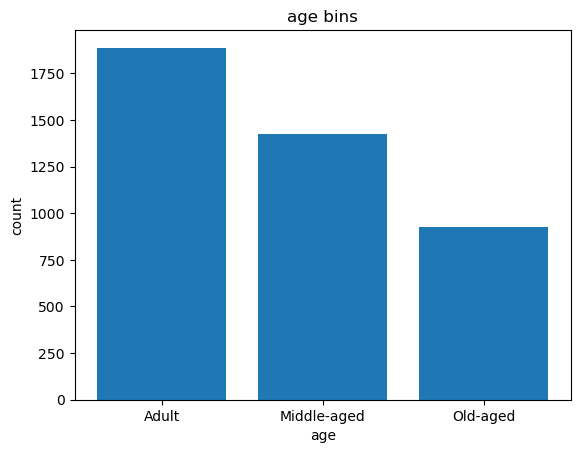

In [43]:
plt.bar(group_names, df["age-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("age")
plt.ylabel("count")
plt.title("age bins")

#### View age-binned against TenYearCHD for significant effect, appears to contribute to prediction with older having more disease

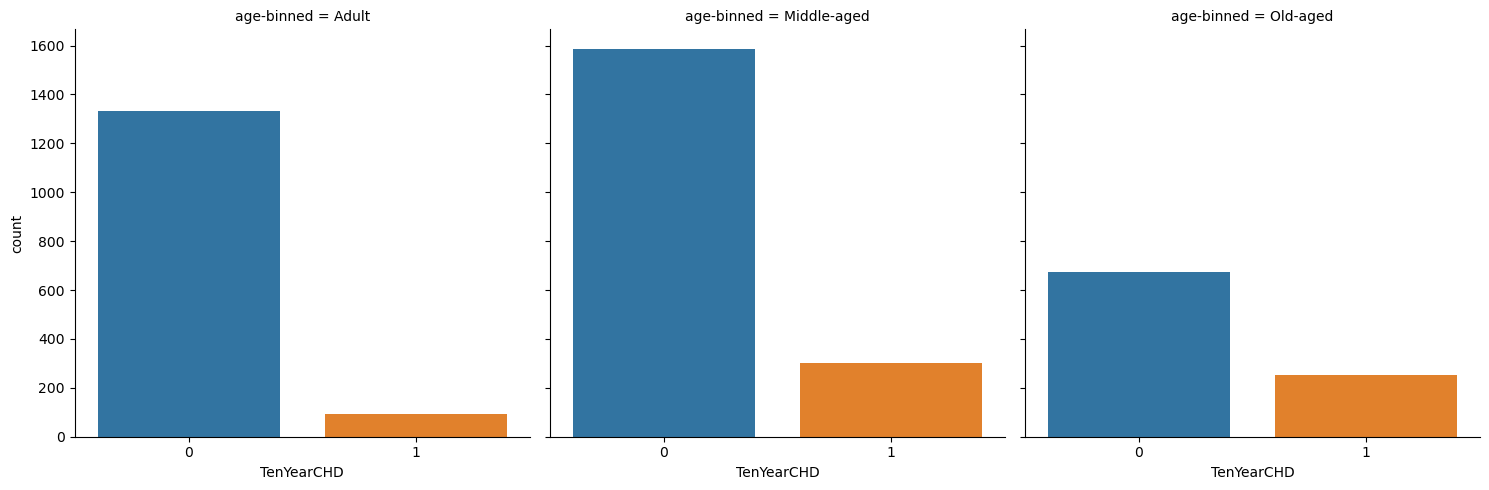

In [44]:
sns.catplot(x='TenYearCHD', col='age-binned', kind='count', data=df)

### totChol Binning

In [45]:
# Binning with specific numbers
cut_labels_4 = ['Normal', 'Borderline High', 'High']
cut_bins = [106, 199, 239, 696]
df['cut_totChol'] = pd.cut(df['totChol'], bins=cut_bins, labels=cut_labels_4)

In [46]:
#Lets see the number of Cholestrol in each bin.
df["cut_totChol"].value_counts()

High               1881
Borderline High    1528
Normal              829
Name: cut_totChol, dtype: int64

In [47]:
df[['totChol','cut_totChol']].head(10)

,totChol,cut_totChol
0,195.0,Normal
1,250.0,High
2,245.0,High
3,225.0,Borderline High
4,285.0,High
5,228.0,Borderline High
6,205.0,Borderline High
7,313.0,High
8,260.0,High
9,225.0,Borderline High


Text(0.5, 1.0, 'totChol cut bins')

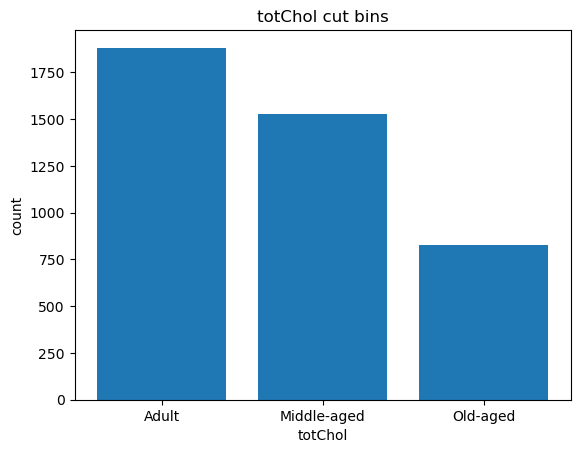

In [48]:
#Lets plot the distribution of each bin.
plt.bar(group_names, df["cut_totChol"].value_counts())

# set x/y labels and plot title
plt.xlabel("totChol")
plt.ylabel("count")
plt.title("totChol cut bins")

### Total Cholesterol appears significant across all bins, Keep as continuous

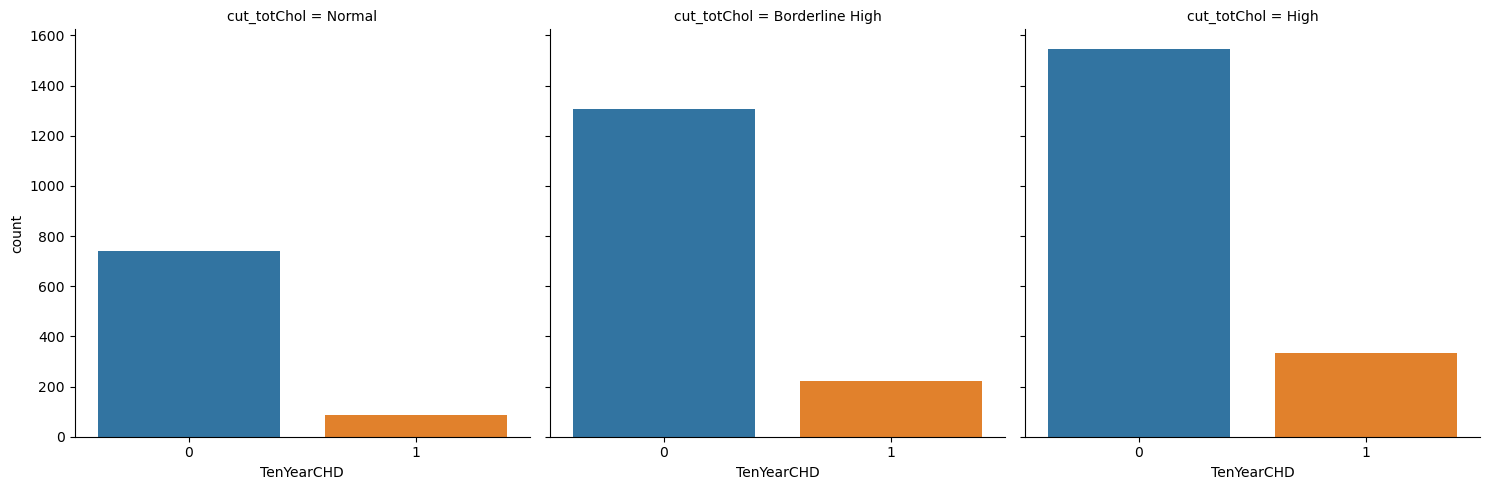

In [49]:
sns.catplot(x='TenYearCHD', col='cut_totChol', kind='count', data=df)
plt.show()

### sysBP

In [50]:
# Binning with specific numbers
cut_labels_4 = ['Normal', 'Elevated', 'Hypertension', 'Hypertension Crisis']
cut_bins = [83, 119, 129, 180, 295]
df['cut_sysBP'] = pd.cut(df['sysBP'], bins=cut_bins, labels=cut_labels_4)

In [51]:
#Lets see the number of Cholestrol in each bin.
df["cut_sysBP"].value_counts()

Hypertension           1865
Normal                 1271
Elevated                944
Hypertension Crisis     158
Name: cut_sysBP, dtype: int64

In [52]:
df[['sysBP','cut_sysBP']].head(10)

,sysBP,cut_sysBP
0,106.0,Normal
1,121.0,Elevated
2,127.5,Elevated
3,150.0,Hypertension
4,130.0,Hypertension
5,180.0,Hypertension
6,138.0,Hypertension
7,100.0,Normal
8,141.5,Hypertension
9,162.0,Hypertension


Text(0.5, 1.0, 'sysBP cut bins')

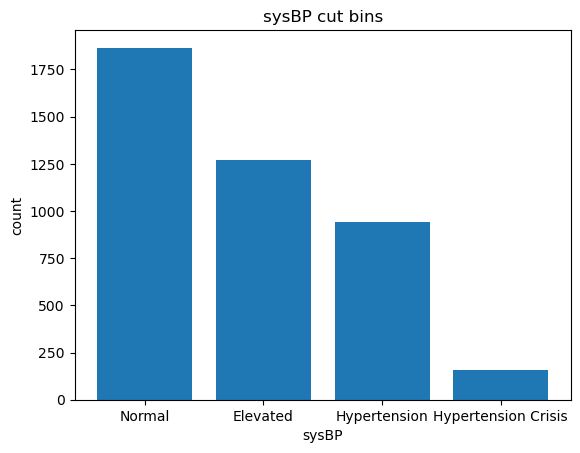

In [53]:
#Lets plot the distribution of each bin.
plt.bar(cut_labels_4, df["cut_sysBP"].value_counts())

# set x/y labels and plot title
plt.xlabel("sysBP")
plt.ylabel("count")
plt.title("sysBP cut bins")

### Hypertension has impact - some variation across Bins, will keep as continuous

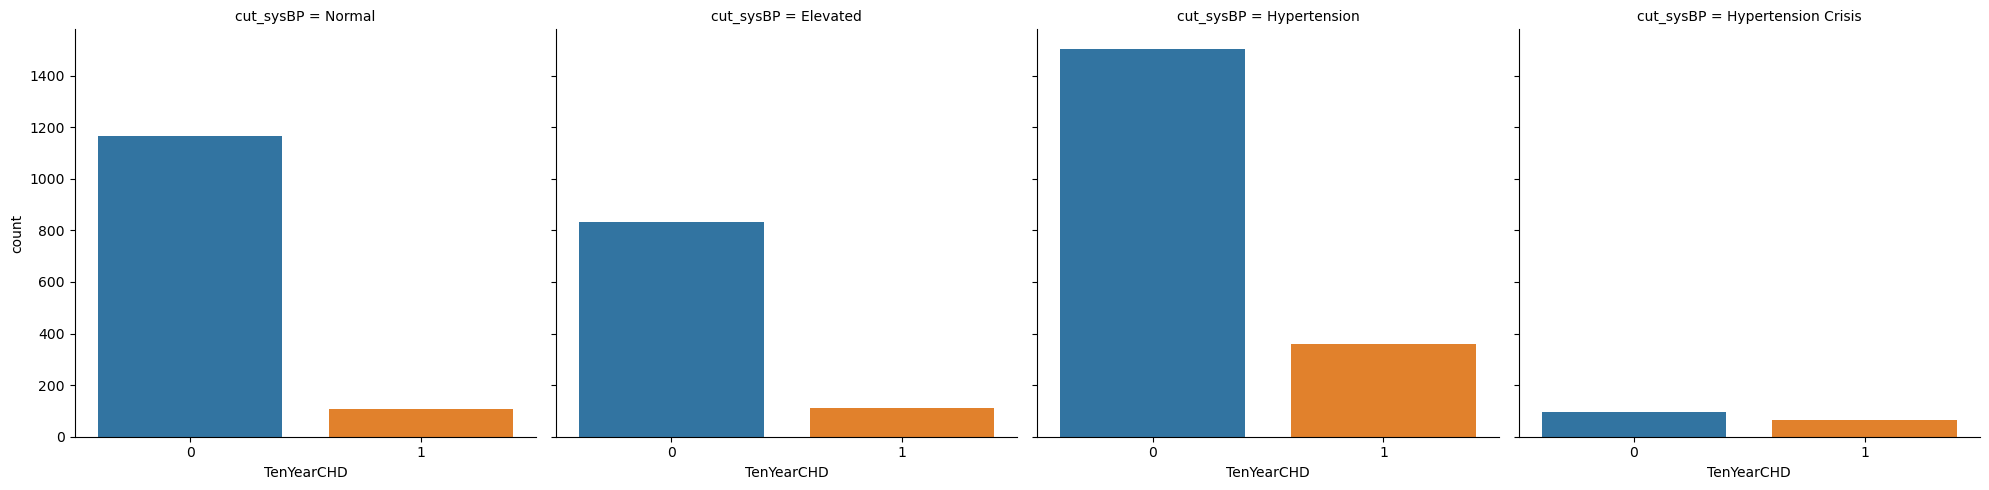

In [54]:
sns.catplot(x='TenYearCHD', col='cut_sysBP', kind='count', data=df)
plt.show()

### diaBP

In [55]:
# Binning with specific numbers
cut_labels_4 = ['Normal/Elevated', 'Hypertension', 'Hypertension Crisis']
cut_bins = [47, 79, 120, 142.50]
df['cut_diaBP'] = pd.cut(df['diaBP'], bins=cut_bins, labels=cut_labels_4)

In [56]:
#Lets see the number of Cholestrol in each bin.
df["cut_diaBP"].value_counts()

Hypertension           2551
Normal/Elevated        1655
Hypertension Crisis      32
Name: cut_diaBP, dtype: int64

In [57]:
df[['diaBP','cut_diaBP']].head(10)

,diaBP,cut_diaBP
0,70.0,Normal/Elevated
1,81.0,Hypertension
2,80.0,Hypertension
3,95.0,Hypertension
4,84.0,Hypertension
5,110.0,Hypertension
6,71.0,Normal/Elevated
7,71.0,Normal/Elevated
8,89.0,Hypertension
9,107.0,Hypertension


Text(0.5, 1.0, 'diaBP cut bins')

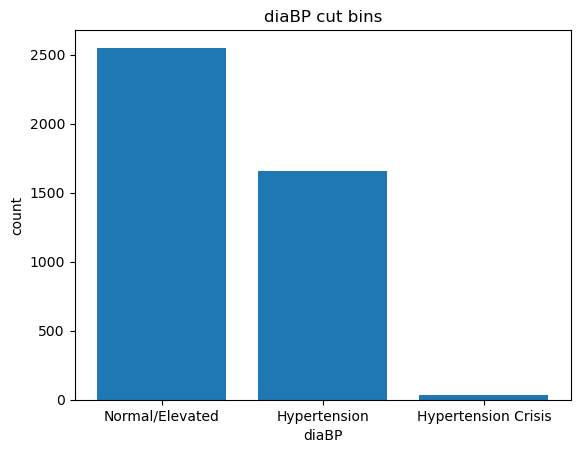

In [58]:
#Lets plot the distribution of each bin.

plt.bar(cut_labels_4, df["cut_diaBP"].value_counts())

# set x/y labels and plot title
plt.xlabel("diaBP")
plt.ylabel("count")
plt.title("diaBP cut bins")

### Diastolic BP has impact - some variation across Bins, will keep as continuous

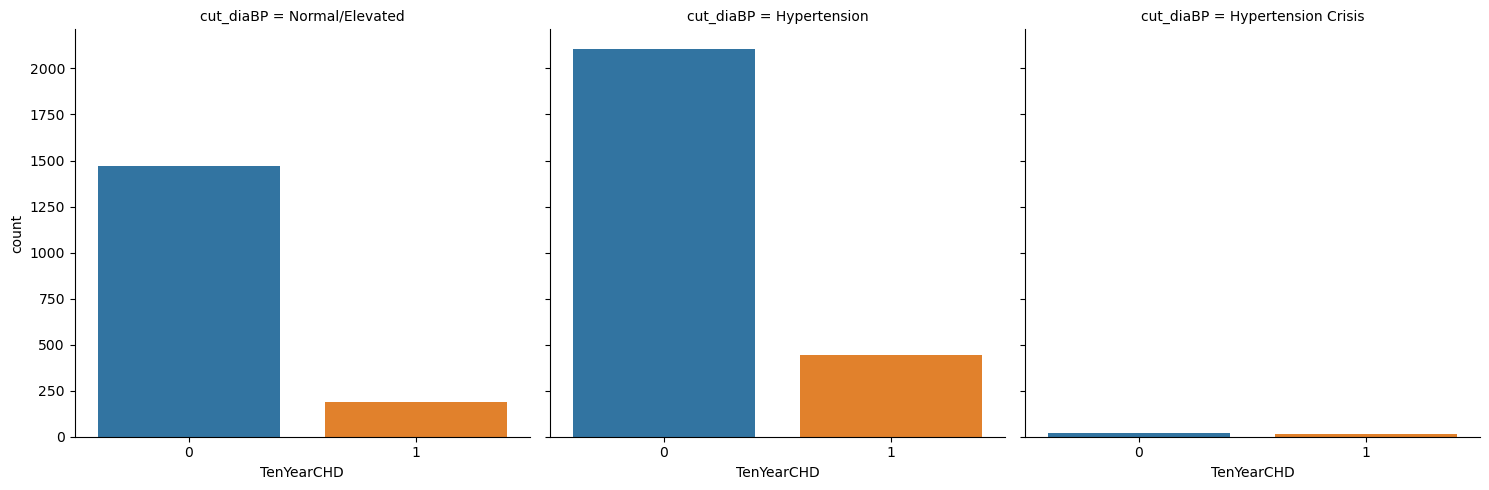

In [59]:
sns.catplot(x='TenYearCHD', col='cut_diaBP', kind='count', data=df)
plt.show()

### Glucose

In [60]:
# Binning with specific numbers
cut_labels_4 = ['In-Range', 'PreDiabetic', 'Diabetes']
#cut_bins = [69, 116, 137, 394]
cut_bins = [0, 116, 137, 394]
df['cut_glucose'] = pd.cut(df['glucose'], bins=cut_bins, labels=cut_labels_4)

In [61]:
#Lets see the number of Cholestrol in each bin.
df["cut_glucose"].value_counts()

In-Range       4108
PreDiabetic      67
Diabetes         63
Name: cut_glucose, dtype: int64

In [62]:
df[['glucose','cut_glucose']].head(10)

,glucose,cut_glucose
0,77.0,In-Range
1,76.0,In-Range
2,70.0,In-Range
3,103.0,In-Range
4,85.0,In-Range
5,99.0,In-Range
6,85.0,In-Range
7,78.0,In-Range
8,79.0,In-Range
9,88.0,In-Range


Text(0.5, 1.0, 'glucose cut bins')

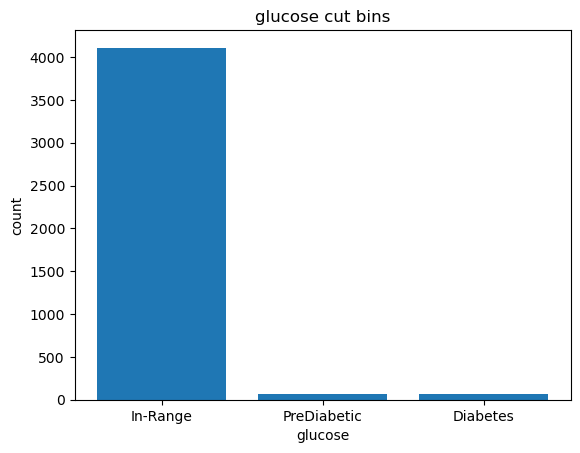

In [63]:
#Lets plot the distribution of each bin.
plt.bar(cut_labels_4, df["cut_glucose"].value_counts())

# set x/y labels and plot title
plt.xlabel("glucose")
plt.ylabel("count")
plt.title("glucose cut bins")

### Data Wrangling Insight:
Binned glucose may best descriminate if binned normal (normal range as 0)  
and abnormal (prediabetes and diabetes ranges as 1)

### Plot binned Glucose with Ten Year CHD outcome variables

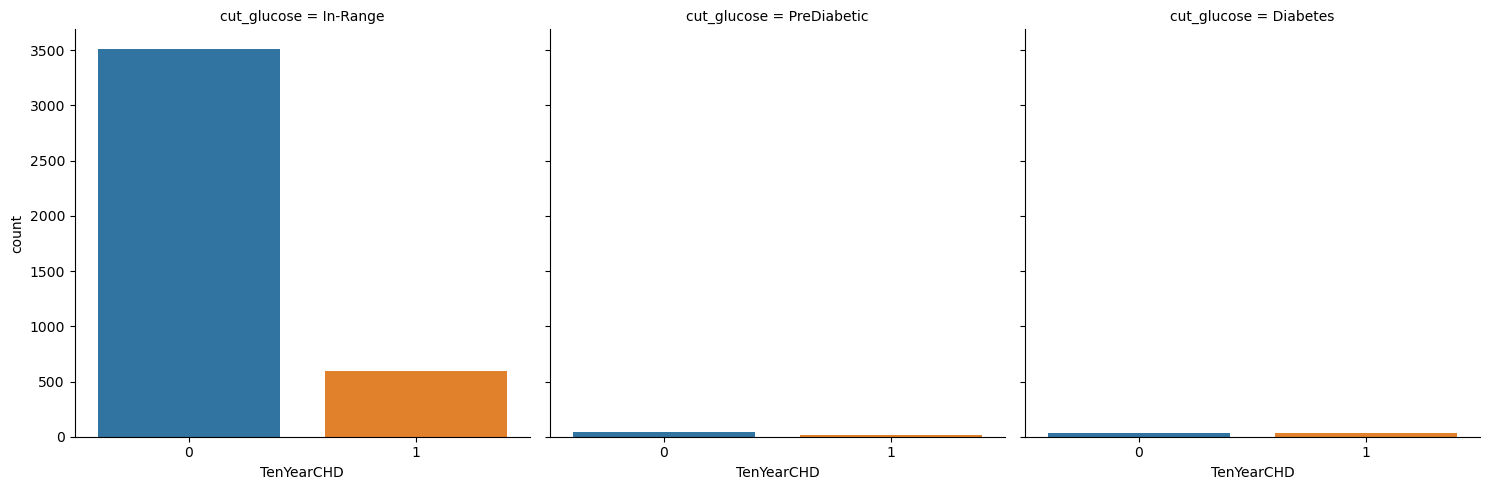

In [64]:
#Catplot for glucose with TenYearCHD status
sns.catplot(x='TenYearCHD', col='cut_glucose', kind='count', data=df)
#plt.tight_layout()

### Convert binned glucose to binary variable 0/1

In [65]:
# Bin gluose to two values, 0 for normal and 1 for abnormal

def bin_glucose(val):
    if val in ['In-Range']:
        return 0
    elif val in ['PreDiabetic','Diabetes']:
        return 1
    else:
        return None  

df['bin_glucose'] = df['cut_glucose'].apply(bin_glucose)

### Plot glucose with TenYearCHD, including precentages of disease states

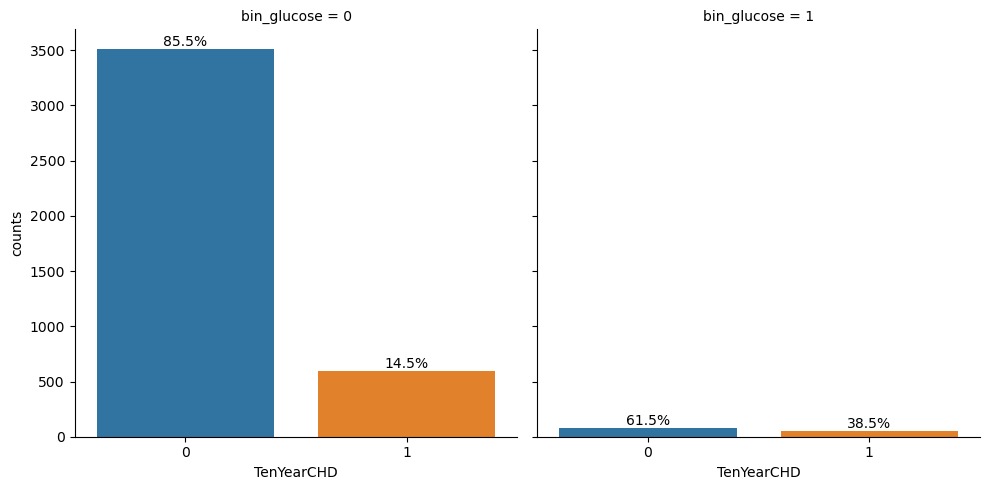

In [66]:
#Plot counts with newly binned glucose to binary state
groupedvalues0 = df[df['bin_glucose'] == 0].groupby(['TenYearCHD']).size().reset_index(name='counts')
groupedvalues0['percentage'] = groupedvalues0['counts'] / groupedvalues0['counts'].sum() * 100
groupedvalues0['bin_glucose'] = 0

groupedvalues1 = df[df['bin_glucose'] == 1].groupby(['TenYearCHD']).size().reset_index(name='counts')
groupedvalues1['percentage'] = groupedvalues1['counts'] / groupedvalues1['counts'].sum() * 100
groupedvalues1['bin_glucose'] = 1

groupedvalues = pd.concat([groupedvalues0, groupedvalues1])

# Create the plot
plot = sns.catplot(x='TenYearCHD', y='counts', col='bin_glucose', kind='bar', data=groupedvalues)

# Iterate over each subplot (i.e., column facet) in the plot
for i, ax in enumerate(plot.axes.flat):
    # Calculate the correct percentages for this group
    if i == 0:
        percentages = groupedvalues0['percentage']
    else:
        percentages = groupedvalues1['percentage']

    # Iterate over each bar in the subplot
    for bar, percentage in zip(ax.patches, percentages):
        # Add an annotation to the bar
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.1f}%'.format(percentage), 
                ha='center', va='bottom')

plt.show()


## Binary Variables

### Plot counts and percentages grouped by presence or absence of TenYearCHD
Variables:  male, currentSmoker, BPMeds, prevalentStroke, prevalentHyp, Diabetes

### Gender-males noted to be higher in representation with CHD presence

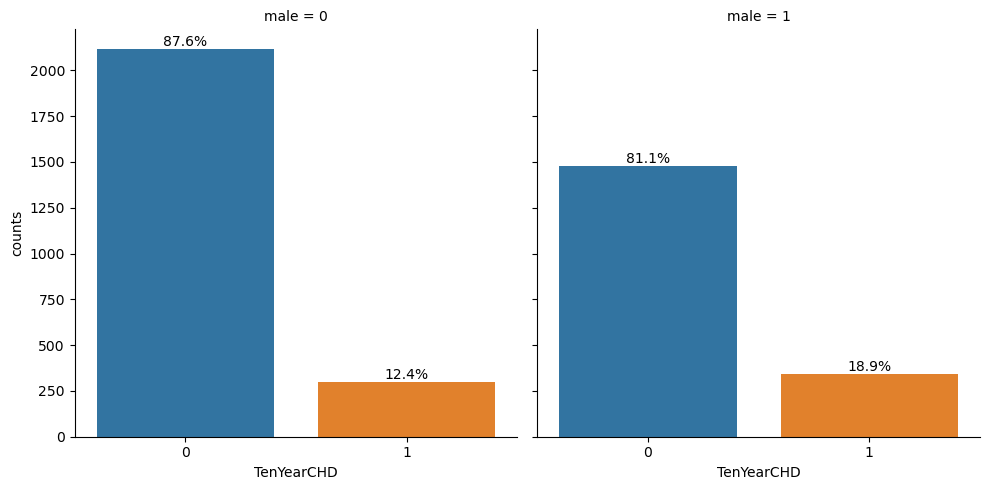

In [67]:
# Calculate the counts and percentages for each group for Gender
groupedvalues0 = df[df['male'] == 0].groupby(['TenYearCHD']).size().reset_index(name='counts')
groupedvalues0['percentage'] = groupedvalues0['counts'] / groupedvalues0['counts'].sum() * 100
groupedvalues0['male'] = 0

groupedvalues1 = df[df['male'] == 1].groupby(['TenYearCHD']).size().reset_index(name='counts')
groupedvalues1['percentage'] = groupedvalues1['counts'] / groupedvalues1['counts'].sum() * 100
groupedvalues1['male'] = 1

groupedvalues = pd.concat([groupedvalues0, groupedvalues1])

# Create the plot
plot = sns.catplot(x='TenYearCHD', y='counts', col='male', kind='bar', data=groupedvalues)

# Iterate over each subplot (i.e., column facet) in the plot
for i, ax in enumerate(plot.axes.flat):
    # Calculate the correct percentages for this group
    if i == 0:
        percentages = groupedvalues0['percentage']
    else:
        percentages = groupedvalues1['percentage']

    # Iterate over each bar in the subplot
    for bar, percentage in zip(ax.patches, percentages):
        # Add an annotation to the bar
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.1f}%'.format(percentage), 
                ha='center', va='bottom')

plt.show()

### Current smoker

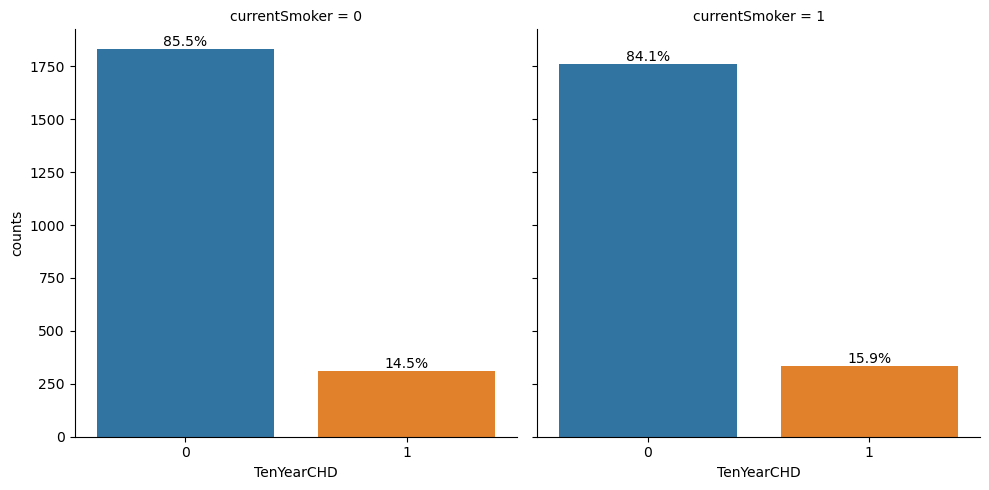

In [68]:
# Calculate the counts and percentages for each group with Current Smoking Status
groupedvalues0 = df[df['currentSmoker'] == 0].groupby(['TenYearCHD']).size().reset_index(name='counts')
groupedvalues0['percentage'] = groupedvalues0['counts'] / groupedvalues0['counts'].sum() * 100
groupedvalues0['currentSmoker'] = 0

groupedvalues1 = df[df['currentSmoker'] == 1].groupby(['TenYearCHD']).size().reset_index(name='counts')
groupedvalues1['percentage'] = groupedvalues1['counts'] / groupedvalues1['counts'].sum() * 100
groupedvalues1['currentSmoker'] = 1

groupedvalues = pd.concat([groupedvalues0, groupedvalues1])

# Create the plot
plot = sns.catplot(x='TenYearCHD', y='counts', col='currentSmoker', kind='bar', data=groupedvalues)

# Iterate over each subplot (i.e., column facet) in the plot
for i, ax in enumerate(plot.axes.flat):
    # Calculate the correct percentages for this group
    if i == 0:
        percentages = groupedvalues0['percentage']
    else:
        percentages = groupedvalues1['percentage']

    # Iterate over each bar in the subplot
    for bar, percentage in zip(ax.patches, percentages):
        # Add an annotation to the bar
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.1f}%'.format(percentage), 
                ha='center', va='bottom')

plt.show()

### *** Data Wrangling Insight:  Current Smoking Variable does not discriminate
Will drop column as smoking status is represented in cigsPerDay variable 

### BP Meds: Positive association with BP meds and presence of Heart disease, is also a marker of hypertension based upon variable definition

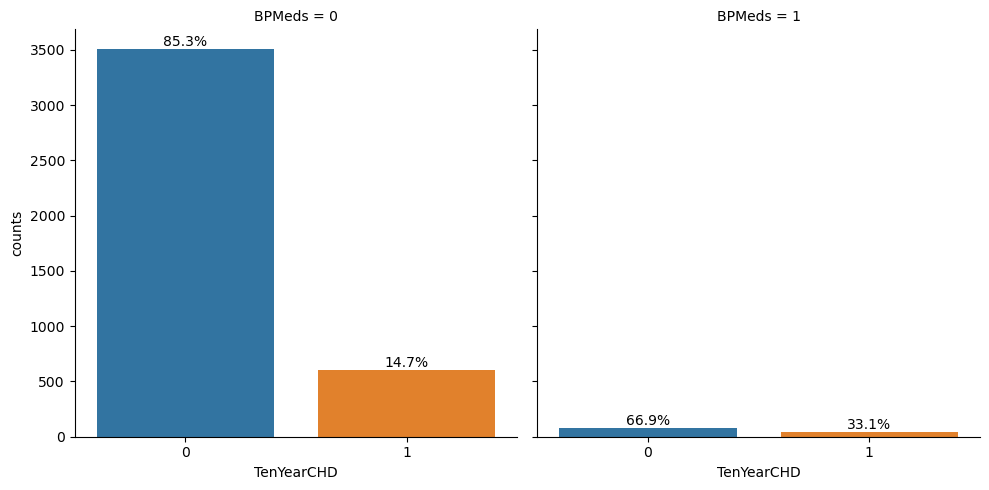

In [69]:
# Calculate the counts and percentages for each group with Blood Pressure Meds
groupedvalues0 = df[df['BPMeds'] == 0].groupby(['TenYearCHD']).size().reset_index(name='counts')
groupedvalues0['percentage'] = groupedvalues0['counts'] / groupedvalues0['counts'].sum() * 100
groupedvalues0['BPMeds'] = 0

groupedvalues1 = df[df['BPMeds'] == 1].groupby(['TenYearCHD']).size().reset_index(name='counts')
groupedvalues1['percentage'] = groupedvalues1['counts'] / groupedvalues1['counts'].sum() * 100
groupedvalues1['BPMeds'] = 1

groupedvalues = pd.concat([groupedvalues0, groupedvalues1])

# Create the plot
plot = sns.catplot(x='TenYearCHD', y='counts', col='BPMeds', kind='bar', data=groupedvalues)

# Iterate over each subplot (i.e., column facet) in the plot
for i, ax in enumerate(plot.axes.flat):
    # Calculate the correct percentages for this group
    if i == 0:
        percentages = groupedvalues0['percentage']
    else:
        percentages = groupedvalues1['percentage']

    # Iterate over each bar in the subplot
    for bar, percentage in zip(ax.patches, percentages):
        # Add an annotation to the bar
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.1f}%'.format(percentage), 
                ha='center', va='bottom')

plt.show()

### Prevalence of Stroke:  High association with CHD when present

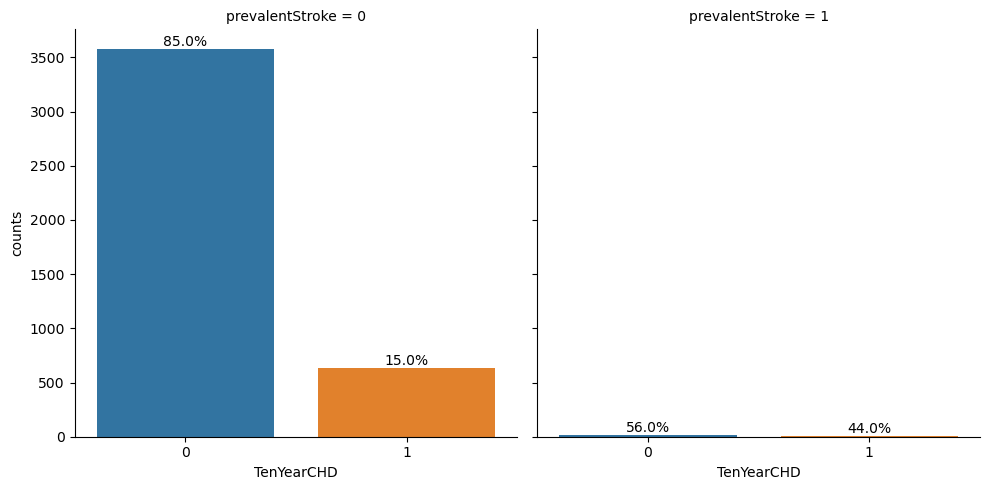

In [70]:
# Calculate the counts and percentages for each group with Stroke
groupedvalues0 = df[df['prevalentStroke'] == 0].groupby(['TenYearCHD']).size().reset_index(name='counts')
groupedvalues0['percentage'] = groupedvalues0['counts'] / groupedvalues0['counts'].sum() * 100
groupedvalues0['prevalentStroke'] = 0

groupedvalues1 = df[df['prevalentStroke'] == 1].groupby(['TenYearCHD']).size().reset_index(name='counts')
groupedvalues1['percentage'] = groupedvalues1['counts'] / groupedvalues1['counts'].sum() * 100
groupedvalues1['prevalentStroke'] = 1

groupedvalues = pd.concat([groupedvalues0, groupedvalues1])

# Create the plot
plot = sns.catplot(x='TenYearCHD', y='counts', col='prevalentStroke', kind='bar', data=groupedvalues)

# Iterate over each subplot (i.e., column facet) in the plot
for i, ax in enumerate(plot.axes.flat):
    # Calculate the correct percentages for this group
    if i == 0:
        percentages = groupedvalues0['percentage']
    else:
        percentages = groupedvalues1['percentage']

    # Iterate over each bar in the subplot
    for bar, percentage in zip(ax.patches, percentages):
        # Add an annotation to the bar
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.1f}%'.format(percentage), 
                ha='center', va='bottom')

plt.show()


### Prevalence of Hypertension:  larger percentage of CHD when present

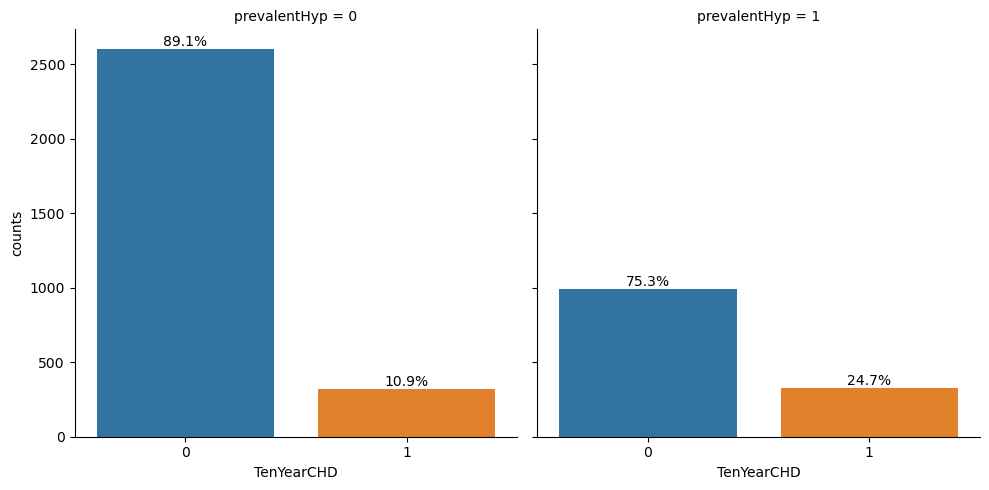

In [71]:
# Calculate the counts and percentages for each group with Hypertension
groupedvalues0 = df[df['prevalentHyp'] == 0].groupby(['TenYearCHD']).size().reset_index(name='counts')
groupedvalues0['percentage'] = groupedvalues0['counts'] / groupedvalues0['counts'].sum() * 100
groupedvalues0['prevalentHyp'] = 0

groupedvalues1 = df[df['prevalentHyp'] == 1].groupby(['TenYearCHD']).size().reset_index(name='counts')
groupedvalues1['percentage'] = groupedvalues1['counts'] / groupedvalues1['counts'].sum() * 100
groupedvalues1['prevalentHyp'] = 1

groupedvalues = pd.concat([groupedvalues0, groupedvalues1])

# Create the plot
plot = sns.catplot(x='TenYearCHD', y='counts', col='prevalentHyp', kind='bar', data=groupedvalues)

# Iterate over each subplot (i.e., column facet) in the plot
for i, ax in enumerate(plot.axes.flat):
    # Calculate the correct percentages for this group
    if i == 0:
        percentages = groupedvalues0['percentage']
    else:
        percentages = groupedvalues1['percentage']

    # Iterate over each bar in the subplot
    for bar, percentage in zip(ax.patches, percentages):
        # Add an annotation to the bar
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.1f}%'.format(percentage), 
                ha='center', va='bottom')

plt.show()


### Explore Education Class

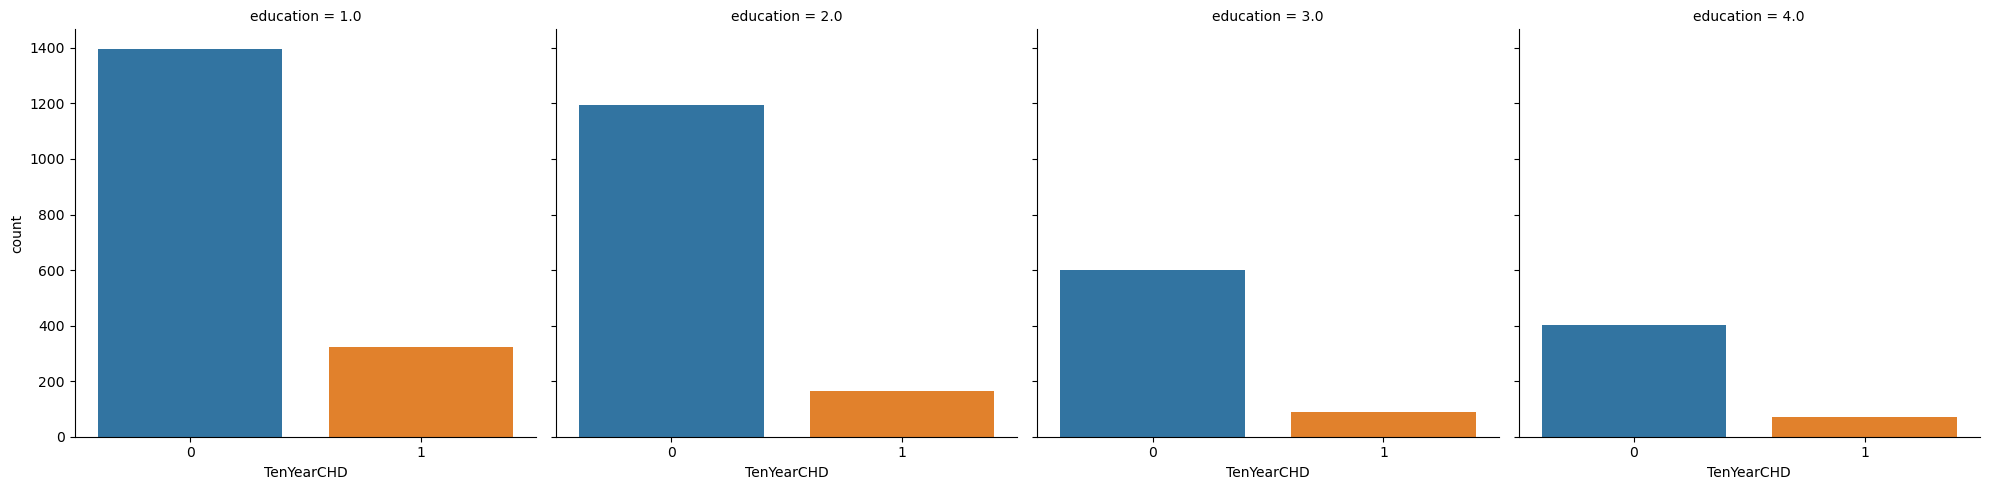

In [72]:
sns.catplot(x='TenYearCHD', col='education', kind='count', data=df)

#### Data Wrangling Insight:  
Educational impact may be more realized with binning classfication 1 & 2 as HighSchool or less (0) 
and Binning 3 & 4 (1) as College/Vocational or Greater

In [73]:
#Bin Education into two groups represented by 0 for original groups 1&2, and 1 for original groups 3&4
def bin_education(val):
    if val in [1, 2]:
        return 0
    elif val in [3, 4]:
        return 1
    else:
        return None  

df['bin_education'] = df['education'].apply(bin_education)

### Plot binned Education with TenYearCHD- Education Appears Protective

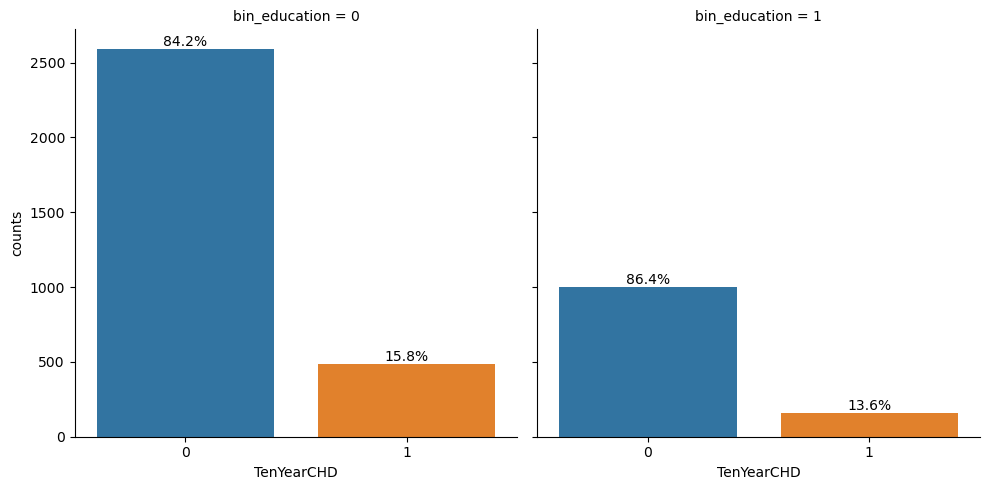

In [74]:
groupedvalues0 = df[df['bin_education'] == 0].groupby(['TenYearCHD']).size().reset_index(name='counts')
groupedvalues0['percentage'] = groupedvalues0['counts'] / groupedvalues0['counts'].sum() * 100
groupedvalues0['bin_education'] = 0

groupedvalues1 = df[df['bin_education'] == 1].groupby(['TenYearCHD']).size().reset_index(name='counts')
groupedvalues1['percentage'] = groupedvalues1['counts'] / groupedvalues1['counts'].sum() * 100
groupedvalues1['bin_education'] = 1

groupedvalues = pd.concat([groupedvalues0, groupedvalues1])

# Create the plot
plot = sns.catplot(x='TenYearCHD', y='counts', col='bin_education', kind='bar', data=groupedvalues)

# Iterate over each subplot (i.e., column facet) in the plot
for i, ax in enumerate(plot.axes.flat):
    # Calculate the correct percentages for this group
    if i == 0:
        percentages = groupedvalues0['percentage']
    else:
        percentages = groupedvalues1['percentage']

    # Iterate over each bar in the subplot
    for bar, percentage in zip(ax.patches, percentages):
        # Add an annotation to the bar
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.1f}%'.format(percentage), 
                ha='center', va='bottom')

plt.show()


### Scale continuous variables to facilitate use in prediction models

In [75]:
#Scale continous variables
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# List of columns to scale
columns_to_scale = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate' ]

# Apply the scaler to the columns in the dataframe and create new columns
for column in columns_to_scale:
    df[column + "_scaled"] = scaler.fit_transform(df[[column]])


### Drop Columns not to be used in training and testing sets

In [76]:
#Drop Columns that are scaled 
df = df.drop(columns=['age','cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'])
#Drop Columns that are replaced by binned columns or that do not discriminate
df = df.drop(columns=['education','currentSmoker'])
#Drop columns created during data exploration- not to be used
df = df.drop(columns=['cut_totChol','cut_sysBP', 'cut_diaBP', 'cut_glucose', 'age-binned'])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               4238 non-null   int64  
 1   BPMeds             4238 non-null   float64
 2   prevalentStroke    4238 non-null   int64  
 3   prevalentHyp       4238 non-null   int64  
 4   diabetes           4238 non-null   int64  
 5   TenYearCHD         4238 non-null   int64  
 6   bin_glucose        4238 non-null   int64  
 7   bin_education      4238 non-null   int64  
 8   age_scaled         4238 non-null   float64
 9   cigsPerDay_scaled  4238 non-null   float64
 10  totChol_scaled     4238 non-null   float64
 11  sysBP_scaled       4238 non-null   float64
 12  diaBP_scaled       4238 non-null   float64
 13  BMI_scaled         4238 non-null   float64
 14  heartRate_scaled   4238 non-null   float64
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


## Split data into Training and Testing Sets

In [78]:
#Obtain list of columns
df.columns

Index(['male', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'TenYearCHD', 'bin_glucose', 'bin_education', 'age_scaled',
       'cigsPerDay_scaled', 'totChol_scaled', 'sysBP_scaled', 'diaBP_scaled',
       'BMI_scaled', 'heartRate_scaled'],
      dtype='object')

In [79]:
from sklearn.model_selection import train_test_split

# Define varaibles in predictor columns
X = df[['male', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'bin_glucose', 'bin_education', 'age_scaled',
       'cigsPerDay_scaled', 'totChol_scaled', 'sysBP_scaled', 'diaBP_scaled',
       'BMI_scaled', 'heartRate_scaled']]

# Define outcome variable
y = df['TenYearCHD']

# Create training and testing sets with 15% of data set reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)

### Examine newly created training and test sets

In [80]:
X_train.head()

,male,BPMeds,prevalentStroke,prevalentHyp,diabetes,bin_glucose,bin_education,age_scaled,cigsPerDay_scaled,totChol_scaled,sysBP_scaled,diaBP_scaled,BMI_scaled,heartRate_scaled
1456,0,0.0,0,0,0,1,0,1.798482,-0.751322,0.209345,-0.605950,-0.578823,-1.467154,-0.073099
1783,1,0.0,0,0,0,0,0,1.448470,0.088944,-1.798723,0.074770,0.092912,0.036358,2.421961
3228,0,0.0,0,0,0,0,0,-1.001610,1.349343,-1.460284,-1.105144,-0.830724,-0.811210,0.758588
1591,0,0.0,0,1,0,0,0,1.215129,-0.751322,-1.505409,0.619346,0.512747,1.623397,-0.655280
3974,0,0.0,0,1,1,1,0,1.681811,-0.751322,0.570346,0.664727,0.596714,0.173934,0.758588


In [81]:
X_test.head()

,male,BPMeds,prevalentStroke,prevalentHyp,diabetes,bin_glucose,bin_education,age_scaled,cigsPerDay_scaled,totChol_scaled,sysBP_scaled,diaBP_scaled,BMI_scaled,heartRate_scaled
1009,0,0.0,0,0,0,0,0,0.165095,-0.667296,-0.377282,0.437821,-0.033038,-1.174804,-1.653304
822,0,0.0,0,0,0,0,0,1.448470,1.769476,0.000000,0.937015,-1.922295,0.409779,-1.320629
2704,0,0.0,0,0,0,0,0,0.165095,-0.751322,-0.873658,-0.197518,0.596714,0.127256,-0.488942
2807,1,0.0,0,0,0,0,0,-0.884939,0.929210,0.096532,-0.651331,0.176879,1.038698,-0.655280
308,0,0.0,0,0,0,0,1,-1.234951,0.929210,0.728283,-1.604339,-1.586427,-0.666264,0.509082


In [82]:
y_train.head()

1456    0
1783    1
3228    0
1591    1
3974    0
Name: TenYearCHD, dtype: int64

In [83]:
y_test.head()

1009    0
822     0
2704    0
2807    1
308     0
Name: TenYearCHD, dtype: int64

### Convert Dataframes to Arrays to use in Modeling

In [84]:
#convert to arrays
X_train_arr = X_train.values
X_test_arr = X_test.values
y_train_arr = y_train.values
y_test_arr = y_test.values


### Create Preliminary Decision Tree

In [85]:
from sklearn import tree
# Instantiate model and fit to data; clf = classifier
dtm = tree.DecisionTreeClassifier(max_depth=4)

# Train our model 
dtm.fit(X_train_arr, y_train_arr)

DecisionTreeClassifier(max_depth=4)

### Plot Tree-Required depth of 4 to realize CHD among branching

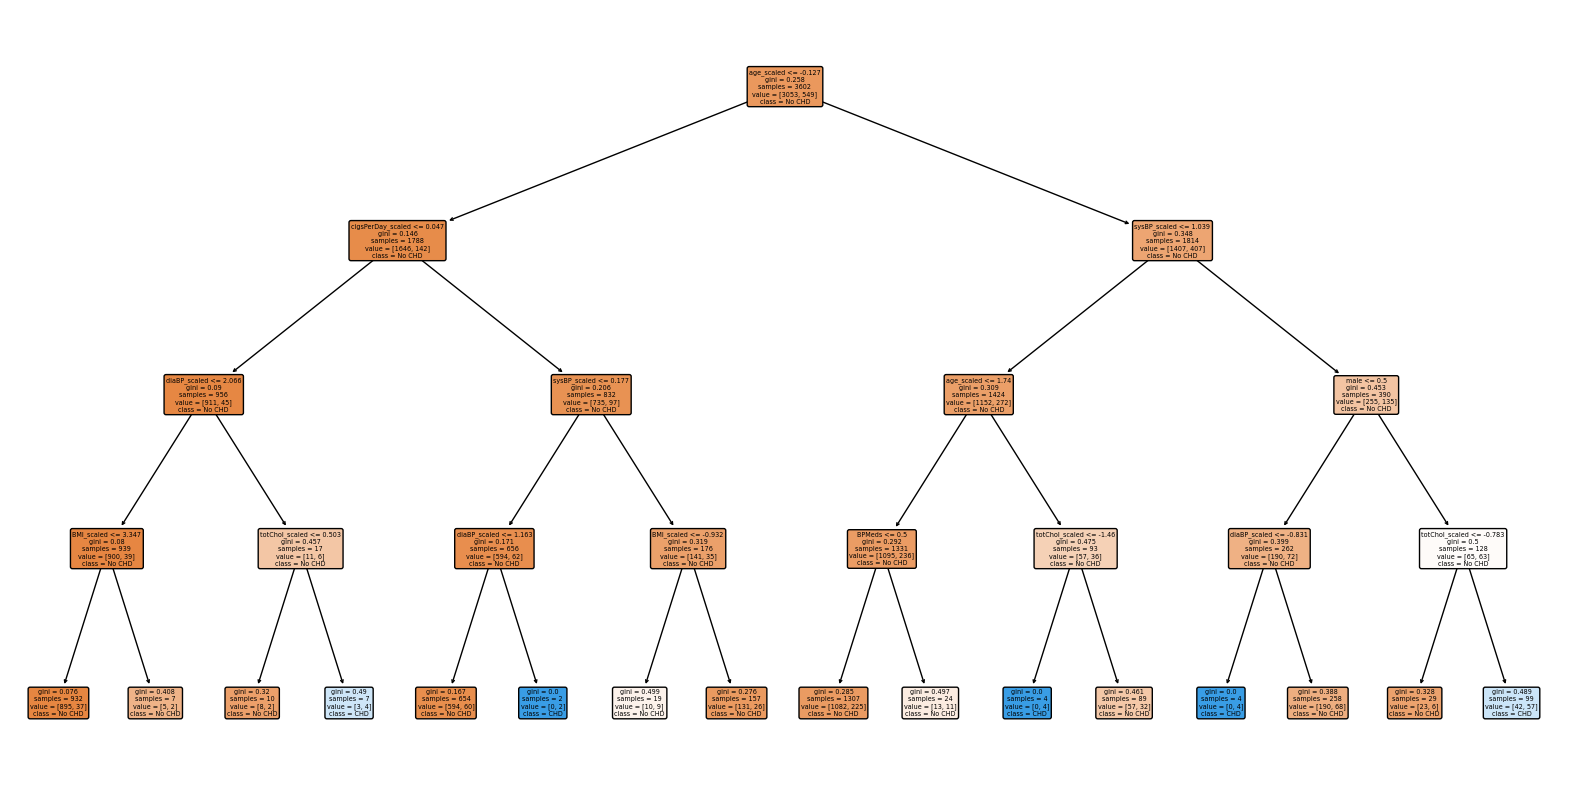

In [86]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))  # Set the figure size
plot_tree(dtm, filled=True, feature_names=X.columns, class_names=['No CHD', 'CHD'], rounded=True)
plt.show()


### Calculate Preliminary Metrics

Accuracy: 84.91%
Confusion Matrix:
[[528  13]
 [ 83  12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       541
           1       0.48      0.13      0.20        95

    accuracy                           0.85       636
   macro avg       0.67      0.55      0.56       636
weighted avg       0.81      0.85      0.81       636

AUC: 0.55


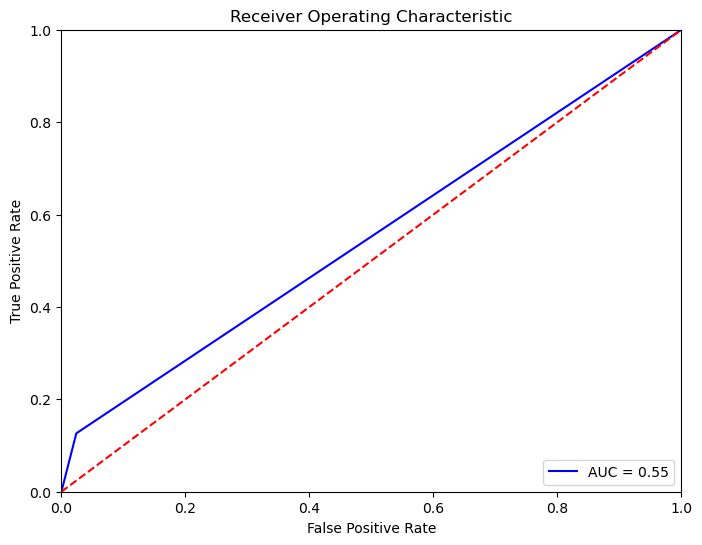

In [87]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Use the model to make predictions on the test set
y_pred = dtm.predict(X_test_arr)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_arr, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_arr, y_pred))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_arr, y_pred))

# Calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test_arr, y_pred)

# Calculate AUC (Area under the ROC Curve )
roc_auc = metrics.auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")

# plot ROC curve
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



###  Interpretation of Decision Tree Performance: 
Accuracy is 85%, correctly predicting the target variable 85% of the time. However, observing the confusion matrix and the recall for class 1 (0.13 or 13%), the model is not doing well at correctly predicting positive cases (in this case, disease presence). This is confirmed by a low F1-score for class 1 (0.20), which takes into account both precision and recall, as well as the Area Under the Curve (AUC) of 0.55 which is barely above random chance. 
The data set is known to be imbalanced, goal will be to improved prediction of positive cases

# ***************************************************************
# <span style="color:red"> BEGIN PROJECT PART 2: MODELING/PREDICTION</span>
# ***************************************************************

## Decision Tree- add SMOTE
Synthetic Minority Over-Sampling Technique may be able to improve model performance due to class imbalance by creating synthetic examples in the minority (class 1, tenYearCHD present) class. Will use the previous decision tree and add this method in attempt to improve performance with positive prediction of those with the disease. 

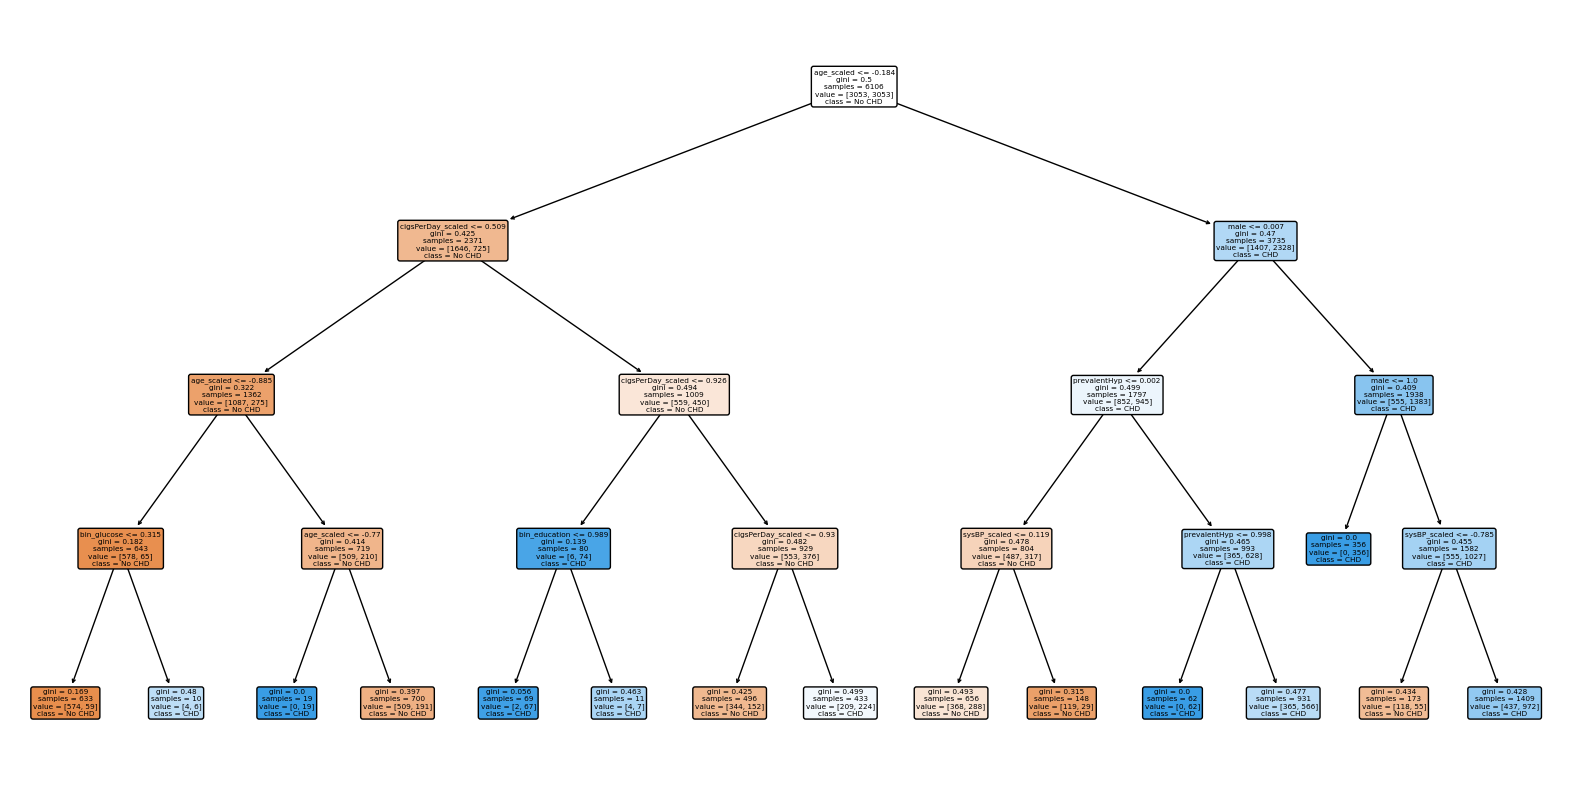

Accuracy: 64.62%
Confusion Matrix:
[[346 195]
 [ 30  65]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.64      0.75       541
           1       0.25      0.68      0.37        95

    accuracy                           0.65       636
   macro avg       0.59      0.66      0.56       636
weighted avg       0.82      0.65      0.70       636

AUC: 0.69


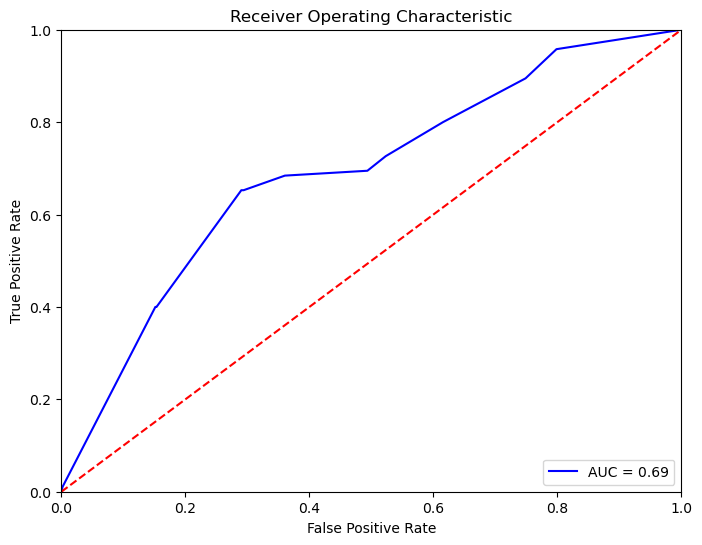

In [88]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Create an instance of SMOTE
smote = SMOTE()

# Fit SMOTE to your data
X_resampled, y_resampled = smote.fit_resample(X_train_arr, y_train_arr)

# Train the model on the upsampled data
dtm = tree.DecisionTreeClassifier(max_depth=4)
dtm.fit(X_resampled, y_resampled)

# Visualize the tree
plt.figure(figsize=(20,10))  # Set the figure size
plot_tree(dtm, filled=True, feature_names=X.columns, class_names=['No CHD', 'CHD'], rounded=True)
plt.show()

# Use the model to make predictions on the test set
y_pred = dtm.predict(X_test_arr)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_arr, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_arr, y_pred))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_arr, y_pred))   

# Use the model to make predictions on the test set
y_pred_proba = dtm.predict_proba(X_test_arr)[:,1]  # get the probability of class 1

# Calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test_arr, y_pred_proba)

# Calculate AUC (Area under the ROC Curve )
roc_auc = metrics.auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")

# plot ROC curve
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Interpretation of Decision Tree- with SMOTE
Model has a lower accuracy (65.88%) but a higher recall for class 1 (0.71 or 71%) and a higher AUC (0.72). This suggests that even though the second model makes more overall mistakes (misclassifications), it is better at identifying positive cases. This improvement is also visible in the F1-score for class 1, which increased to 0.38.

In medical scenarios like disease prediction, we often care more about high recall for the disease class (we want to catch as many true positive cases as possible to prevent missed diagnoses) than about high overall accuracy. However, the trade-off is that this model with SMOTE  has a higher false positive rate (misdiagnosing healthy patients), which can be seen in the larger number of false positives in the confusion matrix.

The choice between these models would depend on the specific requirements and constraints of the problem. When the cost of missing a positive case is high (in this case missing the opportunity to intervene for heart disease prevention), this model might be preferred over the first decision tree despite its lower overall accuracy.

Will continue to explore with different modelling techniques.

## Build Random Forrest Model- with Bootstrapping defaulted

RandomForestClassifier- given binary outcome

### Include all variables after Wrangling from Part 1

Accuracy: 0.8490566037735849

Confusion Matrix:
[[536   5]
 [ 91   4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       541
           1       0.44      0.04      0.08        95

    accuracy                           0.85       636
   macro avg       0.65      0.52      0.50       636
weighted avg       0.79      0.85      0.79       636

F1 Score: 0.07692307692307691

ROC AUC Score: 0.5164315594902228



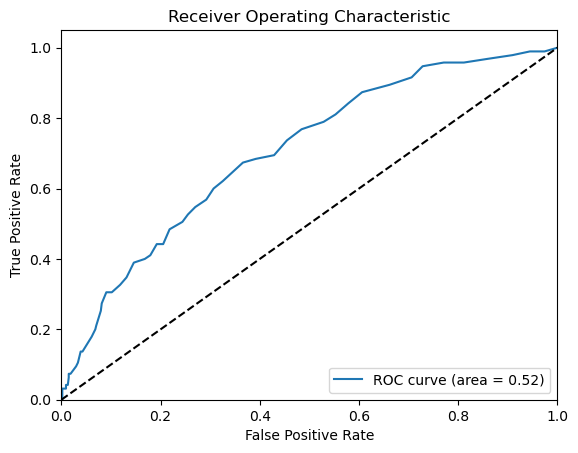

              Feature  Importance
12         BMI_scaled    0.156992
10       sysBP_scaled    0.153658
9      totChol_scaled    0.141991
7          age_scaled    0.135625
11       diaBP_scaled    0.132712
13   heartRate_scaled    0.120894
8   cigsPerDay_scaled    0.064066
0                male    0.021716
6       bin_education    0.020728
3        prevalentHyp    0.017947
5         bin_glucose    0.011365
4            diabetes    0.008795
1              BPMeds    0.008468
2     prevalentStroke    0.005042


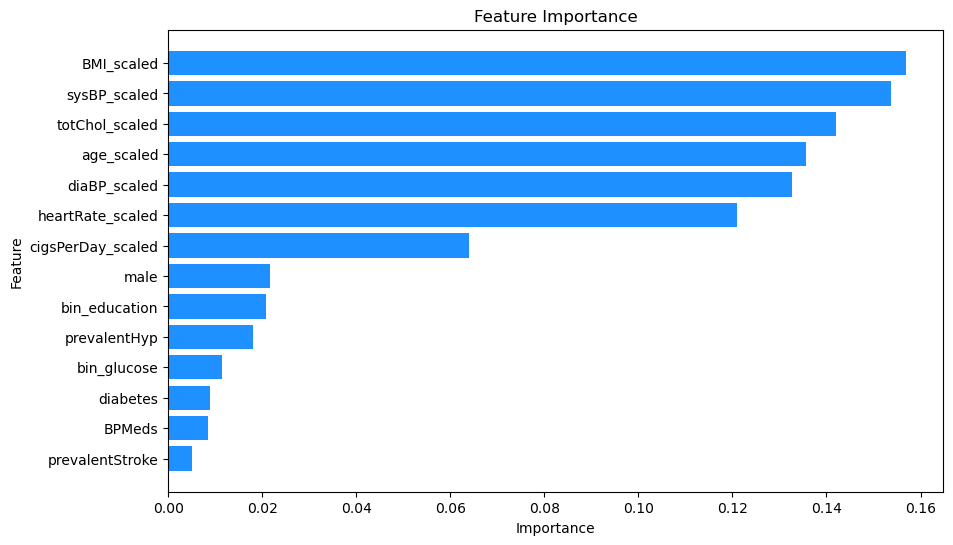

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the model
model = RandomForestClassifier()

# Fit the model
model.fit(X_train_arr, y_train_arr)

# Predict the test set results
y_pred = model.predict(X_test_arr)

# Calculate accuracy
accuracy = accuracy_score(y_test_arr, y_pred)
print(f"Accuracy: {accuracy}\n")

# Print the confusion matrix
conf_mat = confusion_matrix(y_test_arr, y_pred)
print(f"Confusion Matrix:\n{conf_mat}\n")

# Print the classification report
class_report = classification_report(y_test_arr, y_pred)
print(f"Classification Report:\n{class_report}")

# Calculate F1 score
f1 = f1_score(y_test_arr, y_pred)
print(f"F1 Score: {f1}\n")

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test_arr, y_pred)
print(f"ROC AUC Score: {roc_auc}\n")

# Compute ROC curve
y_pred_proba = model.predict_proba(X_test_arr)[::,1]
fpr, tpr, _ = roc_curve(y_test_arr, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Get importance
importances = model.feature_importances_

# Convert the importances into a DataFrame
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,  # replace X_train with your DataFrame
    'Importance': importances
})

# Optionally sort the DataFrame by importance
feature_importances_df.sort_values('Importance', ascending=False, inplace=True)

print(feature_importances_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='dodgerblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # reverse the order of features
plt.show()


###  Interpretation of Random Forest Performance: 
Accuracy:  correctly predicts 85% in class  
Correct prediction of positives: 44% for class 1, 85% for Class 0  
Identifies 4% of actual class 1 instances  (missess large number of positive cases)  
Identifies 99% of actual class 0 instances  
AUC is 0.51, low, barely better than change  
Poorly performs for disease prediction

### Use Feature Importance to reduce to most significant predictors for comparison

Accuracy: 0.8490566037735849

Confusion Matrix:
[[536   5]
 [ 91   4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       541
           1       0.45      0.05      0.09        95

    accuracy                           0.85       636
   macro avg       0.66      0.52      0.51       636
weighted avg       0.80      0.85      0.79       636

F1 Score: 0.09433962264150943

ROC AUC Score: 0.5207705029672147



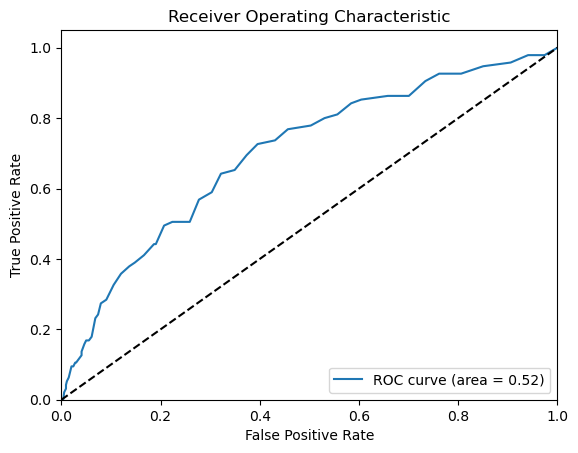

In [90]:
#choose high performing feature importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get top 8 features
top_8_features = feature_importances_df.nlargest(8, 'Importance')['Feature']

# Create new training and test sets with only top 8 features
X_train_top_8 = X_train[top_8_features]
X_test_top_8 = X_test[top_8_features]

# Convert dataframes to numpy arrays
X_train_top_8_arr = X_train_top_8.values
X_test_top_8_arr = X_test_top_8.values

# Initialize the model
model_top_8 = RandomForestClassifier()

# Fit the model
model_top_8.fit(X_train_top_8_arr, y_train_arr)

# Predict the test set results
y_pred8 = model_top_8.predict(X_test_top_8_arr)

# Calculate accuracy
accuracy = accuracy_score(y_test_arr, y_pred8)
print(f"Accuracy: {accuracy}\n")

# Print the confusion matrix
conf_mat = confusion_matrix(y_test_arr, y_pred)
print(f"Confusion Matrix:\n{conf_mat}\n")

# Print the classification report
class_report = classification_report(y_test_arr, y_pred8)
print(f"Classification Report:\n{class_report}")

# Calculate F1 score
f1 = f1_score(y_test_arr, y_pred8)
print(f"F1 Score: {f1}\n")

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test_arr, y_pred8)
print(f"ROC AUC Score: {roc_auc}\n")

# Compute ROC curve
y_pred_prob8 = model_top_8.predict_proba(X_test_top_8_arr)[::,1]
fpr, tpr, _ = roc_curve(y_test_arr, y_pred_prob8)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



### Interpretation of Random Forest with select variables through Feature Importance
Not significantly improved with reduction in variables using feature importance

## Using SMOTE in Random Forest
Attempt to improve performance driven by class imbalance

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       541
           1       0.29      0.26      0.28        95

    accuracy                           0.79       636
   macro avg       0.58      0.58      0.58       636
weighted avg       0.79      0.79      0.79       636

F1 Score: 0.27624309392265195

ROC AUC Score: 0.5752018678859812



C:\Users\tjagn\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


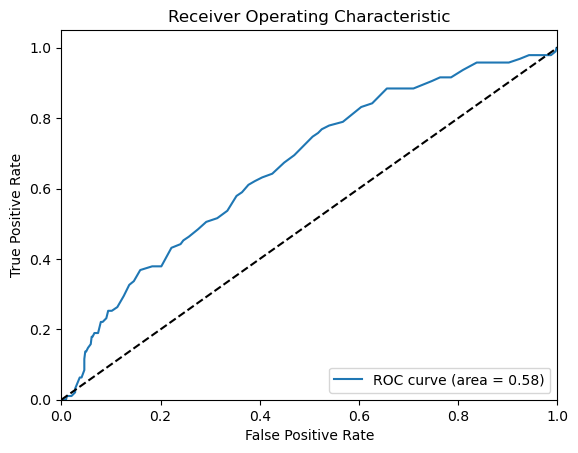

In [91]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Apply SMOTE to generate synthetic samples
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a random forest classifier
rfm = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifier
rfm.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = rfm.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate F1 score
f1 = f1_score(y_test_arr, y_pred)
print(f"F1 Score: {f1}\n")

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test_arr, y_pred)
print(f"ROC AUC Score: {roc_auc}\n")

# Compute ROC curve
y_pred_proba = rfm.predict_proba(X_test_arr)[::,1]
fpr, tpr, _ = roc_curve(y_test_arr, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Interpretation of Random Forest with SMOTE- and Overall
Slight improvement, but still with low AUC, Performs well in class 0 with prediction and recall (87%, 89%), but for class 1 again, much lower performance.  Prediction for class 1 is 29%, and correctly identifying class 1 is 26%.  

None of the three models under Random Forest technique significantly improved prediction and discrimnation to disease categories.  Will pursue logistic regression for improved fit.

## Logistic Regression-Begin with inclusion of all predictors

Accuracy: 0.8553459119496856

Confusion Matrix:
[[538   3]
 [ 89   6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       541
           1       0.67      0.06      0.12        95

    accuracy                           0.86       636
   macro avg       0.76      0.53      0.52       636
weighted avg       0.83      0.86      0.80       636

F1 Score: 0.11538461538461539

ROC AUC Score: 0.5288063041151863



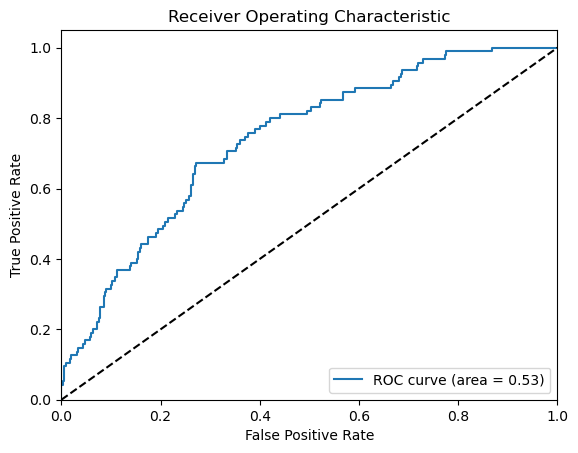

In [92]:
#Build Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize the model
Logistic_regression = LogisticRegression()

# Fit the model
Logistic_regression.fit(X_train_arr, y_train_arr)

# Predict the test set results
test_prediction = Logistic_regression.predict(X_test_arr)

# Calculate accuracy
test_acc_score = accuracy_score(y_test_arr, test_prediction)
print(f"Accuracy: {test_acc_score}\n")

# Print the confusion matrix
conf_mat = confusion_matrix(y_test_arr, test_prediction)
print(f"Confusion Matrix:\n{conf_mat}\n")

# Print the classification report
class_report = classification_report(y_test_arr, test_prediction)
print(f"Classification Report:\n{class_report}")

# Calculate F1 score
f1 = f1_score(y_test_arr, test_prediction)
print(f"F1 Score: {f1}\n")

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test_arr, test_prediction)
print(f"ROC AUC Score: {roc_auc}\n")

# Compute ROC curve
test_prediction_proba = Logistic_regression.predict_proba(X_test_arr)[::,1]
fpr, tpr, _ = roc_curve(y_test_arr, test_prediction_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### **Check for overfitting or underfitting** 

In [93]:
train_prediction = Logistic_regression.predict(X_train_arr)
train_acc_score = accuracy_score(y_train_arr, train_prediction)
train_acc_score

0.8545252637423654

In [94]:
print('Training set score: {:.4f}'.format(train_acc_score))

print('Test set score: {:.4f}'.format(test_acc_score))

Training set score: 0.8545
Test set score: 0.8553


### Demonstrate Model Fit

In [95]:
#Demonstrate Regression results with predictor variable significance
import statsmodels.api as sm

# Add a constant to the original DataFrame
X_train_with_const = sm.add_constant(X_train)

# Convert it to a NumPy array
X_train_arr_with_const = X_train_with_const.values

# Convert the NumPy array back to a DataFrame
X_train_df = pd.DataFrame(X_train_arr_with_const, columns=X_train_with_const.columns)

model = sm.Logit(y_train_arr, X_train_df)
result = model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.380283
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3602
Model:                          Logit   Df Residuals:                     3587
Method:                           MLE   Df Model:                           14
Date:                Thu, 03 Aug 2023   Pseudo R-squ.:                  0.1091
Time:                        18:28:08   Log-Likelihood:                -1369.8
converged:                       True   LL-Null:                       -1537.6
Covariance Type:            nonrobust   LLR p-value:                 4.172e-63
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.2744      0.096    -23.688      0.000      -2.463      -2.086
male    

### Interpretation of Logistic Regression (Above) 
Once again accuracy is 85%, driven by good performance in Class 0 category, however model remains with low AUC and overall fit, and continues to fail at identifying true positives (cases).

### Run Logistic Regression and select only predictor variables that demonstrate significance of p <0.05 from full model

Optimization terminated successfully.
         Current function value: 0.380283
         Iterations 7
Accuracy: 0.85062893081761

Confusion Matrix:
[[541   0]
 [ 95   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       541
           1       0.00      0.00      0.00        95

    accuracy                           0.85       636
   macro avg       0.43      0.50      0.46       636
weighted avg       0.72      0.85      0.78       636

F1 Score: 0.0

ROC AUC Score: 0.5



C:\Users\tjagn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tjagn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tjagn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


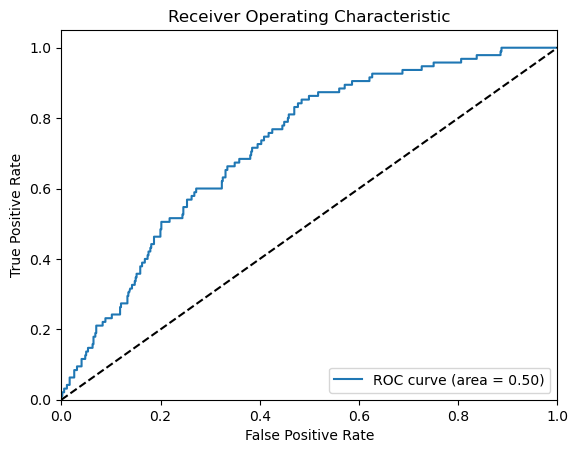

In [96]:
#Run Logistic Regression with only significant predictor variabls

import statsmodels.api as sm
import numpy as np

# Add constant to the input data
X_train_with_const = sm.add_constant(X_train_arr)

# Fit the model
logit_model = sm.Logit(y_train_arr, X_train_with_const)
result = logit_model.fit()

# Get a Series of pvalues
p_values = result.pvalues

# Get the indices of the features that have p-values less than 0.05
sig_feature_indices = np.where(p_values < 0.05)[0]

# Train sklearn's LogisticRegression with significant features only
X_train_sig = X_train_arr[:, sig_feature_indices]
X_test_sig = X_test_arr[:, sig_feature_indices]

# Initialize the model
Logistic_regression = LogisticRegression()

# Fit the model
Logistic_regression.fit(X_train_sig, y_train_arr)

# Predict the test set results
test_prediction = Logistic_regression.predict(X_test_sig)

# Calculate accuracy
test_acc_score = accuracy_score(y_test_arr, test_prediction)
print(f"Accuracy: {test_acc_score}\n")

# Print the confusion matrix
conf_mat = confusion_matrix(y_test_arr, test_prediction)
print(f"Confusion Matrix:\n{conf_mat}\n")

# Print the classification report
class_report = classification_report(y_test_arr, test_prediction)
print(f"Classification Report:\n{class_report}")

# Calculate F1 score
f1 = f1_score(y_test_arr, test_prediction)
print(f"F1 Score: {f1}\n")

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test_arr, test_prediction)
print(f"ROC AUC Score: {roc_auc}\n")

# Compute ROC curve
test_prediction_proba = Logistic_regression.predict_proba(X_test_sig)[::,1]
fpr, tpr, _ = roc_curve(y_test_arr, test_prediction_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Interpretation:  Logistic Regression with only Significant Predictors (p<0.05)-
Minimal Improvement is Noted, not acceptable for use with prediction

## Logistic Regression with SMOTE

Accuracy: 67.14%
Confusion Matrix:
[[359 182]
 [ 27  68]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.66      0.77       541
           1       0.27      0.72      0.39        95

    accuracy                           0.67       636
   macro avg       0.60      0.69      0.58       636
weighted avg       0.83      0.67      0.72       636

F1 Score: 0.0

ROC AUC Score: 0.5



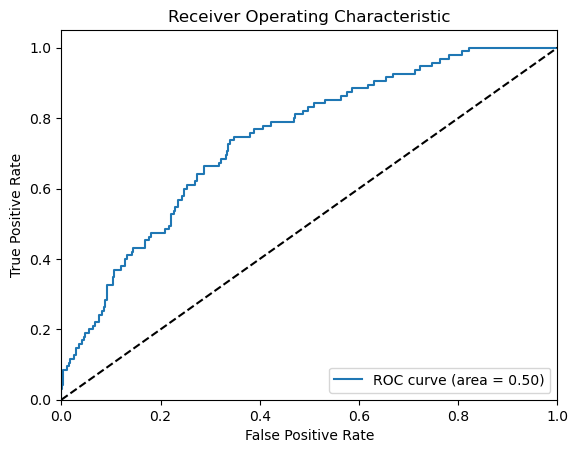

In [97]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define SMOTE
sm = SMOTE(random_state=42)

# Fit SMOTE to the training data
X_train_res, y_train_res = sm.fit_resample(X_train_arr, y_train_arr)

# Initialize LogisticRegression and fit to the resampled training data
lrm= LogisticRegression()
lrm.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred = lrm.predict(X_test_arr)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_arr, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_arr, y_pred))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_arr, y_pred))

# Calculate F1 score
f1 = f1_score(y_test_arr, test_prediction)
print(f"F1 Score: {f1}\n")

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test_arr, test_prediction)
print(f"ROC AUC Score: {roc_auc}\n")

# Compute ROC curve
test_prediction_proba = lrm.predict_proba(X_test_arr)[::,1]
fpr, tpr, _ = roc_curve(y_test_arr, test_prediction_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Interpretation Logistic Regression with SMOTE
In this model,  precision in class 0 is 93% and for class 1 is 27%.  It is more likely to classify a negative case correctly but has a higher false positive rate.  For recall, in class 0 it is 66%, and class 1 it is 72%.  This model has an improvement in capturing the positive class, compared to the model without SMOTE.  Discrimination remains poor with AUC at 0.50.

Will move on to Neural Networks for analysis.

## Neural Networks

### Build Neural Network model using Keras Sequential Model

#### Import additional packages for neural network modeling

In [98]:
#import tensorflow
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

#### Build neural network model with all original variables after wrangling

Epoch 1/20
113/113 [==============================] - 1s 815us/step - loss: 0.4540 - accuracy: 0.8465
Epoch 2/20
113/113 [==============================] - 0s 761us/step - loss: 0.4025 - accuracy: 0.8476
Epoch 3/20
113/113 [==============================] - 0s 753us/step - loss: 0.3924 - accuracy: 0.8479
Epoch 4/20
113/113 [==============================] - 0s 855us/step - loss: 0.3880 - accuracy: 0.8490
Epoch 5/20
113/113 [==============================] - 0s 841us/step - loss: 0.3850 - accuracy: 0.8479
Epoch 6/20
113/113 [==============================] - 0s 848us/step - loss: 0.3822 - accuracy: 0.8495
Epoch 7/20
113/113 [==============================] - 0s 788us/step - loss: 0.3804 - accuracy: 0.8506
Epoch 8/20
113/113 [==============================] - 0s 695us/step - loss: 0.3788 - accuracy: 0.8504
Epoch 9/20
113/113 [==============================] - 0s 860us/step - loss: 0.3764 - accuracy: 0.8509
Epoch 10/20
113/113 [==============================] - 0s 759us/step - loss: 0.375

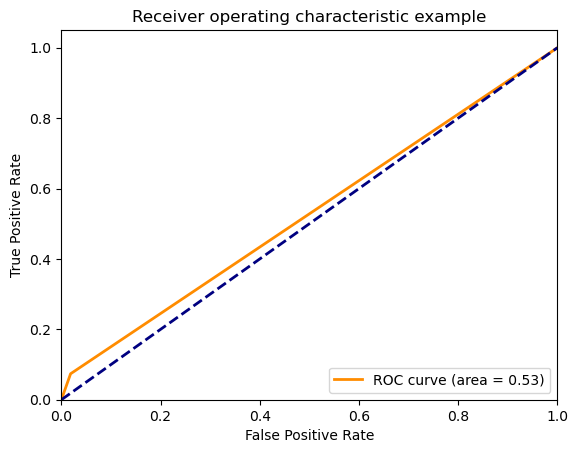

In [99]:
# Define the model
model = keras.models.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate the model on test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Make predictions
y_pred = model.predict(X_test)
y_pred = [1 if p > 0.5 else 0 for p in y_pred]

# Print classification report
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


## Interpretation Neural Network:  
Surprisingly poor performance, AUC near 0.5 (chance).  Model fails with identifying Class 1 instances, and performs best with Class 0 prediction/identification.


## Neural network with SMOTE


Epoch 1/20
180/180 [==============================] - 1s 731us/step - loss: 0.6393 - accuracy: 0.6359
Epoch 2/20
180/180 [==============================] - 0s 722us/step - loss: 0.5974 - accuracy: 0.6801
Epoch 3/20
180/180 [==============================] - 0s 716us/step - loss: 0.5886 - accuracy: 0.6930
Epoch 4/20
180/180 [==============================] - 0s 716us/step - loss: 0.5816 - accuracy: 0.6937
Epoch 5/20
180/180 [==============================] - 0s 733us/step - loss: 0.5749 - accuracy: 0.6986
Epoch 6/20
180/180 [==============================] - 0s 716us/step - loss: 0.5698 - accuracy: 0.7040
Epoch 7/20
180/180 [==============================] - 0s 719us/step - loss: 0.5651 - accuracy: 0.7101
Epoch 8/20
180/180 [==============================] - 0s 710us/step - loss: 0.5601 - accuracy: 0.7094
Epoch 9/20
180/180 [==============================] - 0s 716us/step - loss: 0.5561 - accuracy: 0.7164
Epoch 10/20
180/180 [==============================] - 0s 713us/step - loss: 0.551

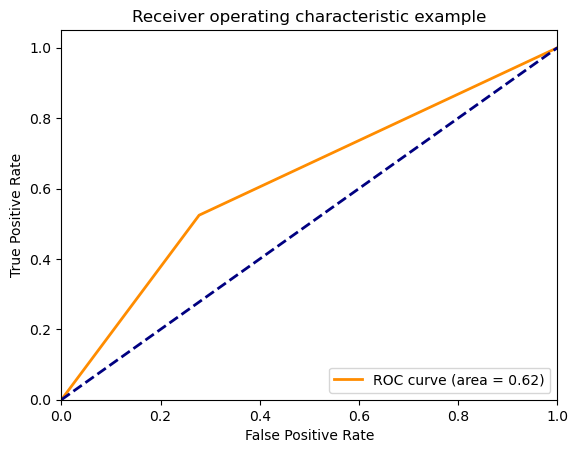

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow import keras
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Scale your data
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Define the model
model = keras.models.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train_res.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(X_train_res, y_train_res, epochs=20, batch_size=32, verbose=1)

# Evaluate the model on test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Make predictions
y_pred = model.predict(X_test)
y_pred = [1 if p > 0.5 else 0 for p in y_pred]

# Print classification report
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


## Interpretation of Neural Network with SMOTE:  
Minimal improvement compared to without SMOTE, and with higher test loss, indicating that the model's prediction aligns less closely with the actual values.  The accuracy is lower as well.  Applying SMOTE to handle class imbalance has reduced overall accuracy and precision, but it has improved recall and F1-score for Class 1 significantly. This trade-off suggests that while the model is less accurate overall, it is better at correctly identifying instances of Class 1 (TenYearCHD present), which is the goal in a situation where predicting Class 1 (e.g., identifying a disease) is more important than overall accuracy.


## Alter class weights without SMOTE


Epoch 1/20
106/106 [==============================] - 1s 803us/step - loss: 0.6467 - accuracy: 0.6805
Epoch 2/20
106/106 [==============================] - 0s 727us/step - loss: 0.6120 - accuracy: 0.6817
Epoch 3/20
106/106 [==============================] - 0s 722us/step - loss: 0.6034 - accuracy: 0.6888
Epoch 4/20
106/106 [==============================] - 0s 717us/step - loss: 0.5988 - accuracy: 0.6746
Epoch 5/20
106/106 [==============================] - 0s 727us/step - loss: 0.5946 - accuracy: 0.6879
Epoch 6/20
106/106 [==============================] - 0s 659us/step - loss: 0.5916 - accuracy: 0.6853
Epoch 7/20
106/106 [==============================] - 0s 811us/step - loss: 0.5892 - accuracy: 0.6894
Epoch 8/20
106/106 [==============================] - 0s 791us/step - loss: 0.5864 - accuracy: 0.6805
Epoch 9/20
106/106 [==============================] - 0s 783us/step - loss: 0.5836 - accuracy: 0.6950
Epoch 10/20
106/106 [==============================] - 0s 858us/step - loss: 0.584

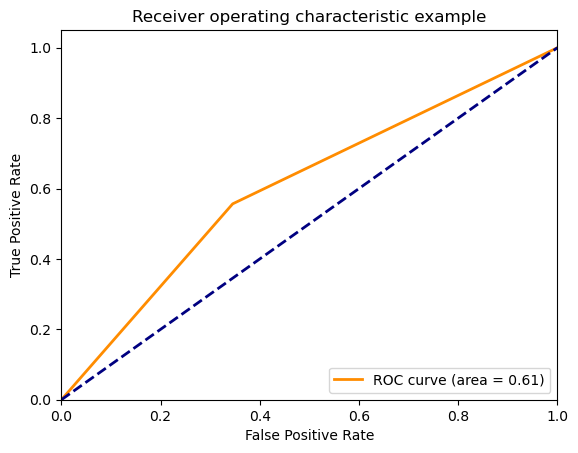

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import compute_sample_weight
from tensorflow import keras
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale your data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compute class weights
class_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Define the model
model = keras.models.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model with class weights
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, sample_weight=class_weights)

# Evaluate the model on test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Make predictions
y_pred = model.predict(X_test)
y_pred = [1 if p > 0.5 else 0 for p in y_pred]

# Print classification report
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


## Interpretation of Altering Class Weights:  
Compared to using SMOTE, adjusting the class weights has led to improvements in test loss, accuracy, precision, recall, and F1-score for both classes. Therefore, in this case, adjusting the class weights seems to be a more effective method for handling class imbalance. 


## Neural Network with SMOTE with adjusted learning rate, batch size and epochs


Epoch 1/50
96/96 [==============================] - 1s 798us/step - loss: 0.6768 - accuracy: 0.5827
Epoch 2/50
96/96 [==============================] - 0s 826us/step - loss: 0.6444 - accuracy: 0.6376
Epoch 3/50
96/96 [==============================] - 0s 826us/step - loss: 0.6399 - accuracy: 0.6384
Epoch 4/50
96/96 [==============================] - 0s 826us/step - loss: 0.6246 - accuracy: 0.6572
Epoch 5/50
96/96 [==============================] - 0s 991us/step - loss: 0.6192 - accuracy: 0.6648
Epoch 6/50
96/96 [==============================] - 0s 954us/step - loss: 0.6178 - accuracy: 0.6657
Epoch 7/50
96/96 [==============================] - 0s 876us/step - loss: 0.6125 - accuracy: 0.6685
Epoch 8/50
96/96 [==============================] - 0s 922us/step - loss: 0.6115 - accuracy: 0.6698
Epoch 9/50
96/96 [==============================] - 0s 884us/step - loss: 0.6117 - accuracy: 0.6698
Epoch 10/50
96/96 [==============================] - 0s 826us/step - loss: 0.6092 - accuracy: 0.6736

96/96 [==============================] - 0s 985us/step - loss: 0.5801 - accuracy: 0.6905
Epoch 28/50
96/96 [==============================] - 0s 891us/step - loss: 0.5796 - accuracy: 0.6901
Epoch 29/50
96/96 [==============================] - 0s 758us/step - loss: 0.5793 - accuracy: 0.6944
Epoch 30/50
96/96 [==============================] - 0s 826us/step - loss: 0.5769 - accuracy: 0.6913
Epoch 31/50
96/96 [==============================] - 0s 844us/step - loss: 0.5769 - accuracy: 0.6954
Epoch 32/50
96/96 [==============================] - 0s 826us/step - loss: 0.5718 - accuracy: 0.7029
Epoch 33/50
96/96 [==============================] - 0s 826us/step - loss: 0.5743 - accuracy: 0.7014
Epoch 34/50
96/96 [==============================] - 0s 859us/step - loss: 0.5731 - accuracy: 0.6969
Epoch 35/50
96/96 [==============================] - 0s 954us/step - loss: 0.5758 - accuracy: 0.6960
Epoch 36/50
96/96 [==============================] - 0s 826us/step - loss: 0.5738 - accuracy: 0.6962
Ep

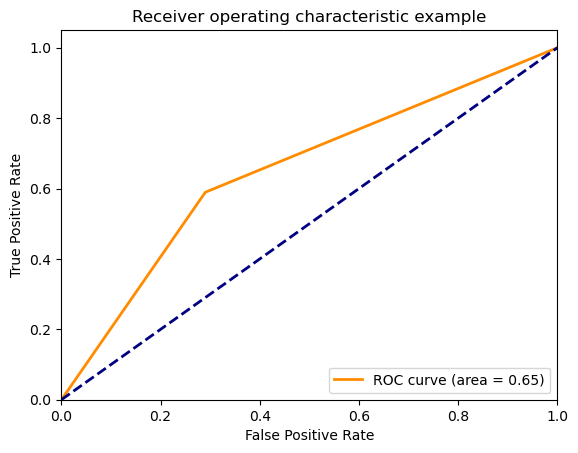

In [102]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.utils import class_weight

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_arr, y_train_arr)

# It can be beneficial to scale your data, particularly when using neural networks
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)
X_test_arr = scaler.transform(X_test_arr)

# Compute class weights
weights = class_weight.compute_sample_weight('balanced', y_res)

# Define the model
nnm = keras.models.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train_arr.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

# Adjust the learning rate
learning_rate = 0.001

# Compile the model with the adjusted learning rate
nnm.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Adjust the batch size and number of epochs
batch_size = 64
num_epochs = 50

# Define early stopping
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Train the model with the adjusted batch size and number of epochs
nnm.fit(X_res, y_res, epochs=num_epochs, batch_size=batch_size, callbacks=[early_stopping], sample_weight=weights)

# Make predictions
y_pred = nnm.predict(X_test_arr)
y_pred = [1 if p > 0.5 else 0 for p in y_pred]

# Evaluate the model
loss, accuracy = nnm.evaluate(X_test_arr, y_test_arr)
roc_auc = roc_auc_score(y_test_arr, y_pred)
print(f"Loss: {loss}, Accuracy: {accuracy}, ROC AUC: {roc_auc}")

# Print classification report
print(classification_report(y_test_arr, y_pred))

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_arr, y_pred)
roc_auc = roc_auc_score(y_test_arr, y_pred)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


### Interpretation of SMOTE with adjusted learning rate, batch size and epoch number
Compared to adjusting the class weights, applying SMOTE with adjustments to learning rate, batch size, and epochs resulted in a slightly worse performance in terms of loss and accuracy, and similar or slightly different results in terms of precision, recall, and F1 score. However, the model's ability to identify Class 1 instances improved, indicated by an increased recall for Class 1. These differences demonstrate our trade-offs when adjusting parameters. 

## Neural Networks with altered class weights and adjusted learning rate, batch size and epoch number

Epoch 1/50
57/57 [==============================] - 1s 766us/step - loss: 0.6821 - accuracy: 0.6116
Epoch 2/50
57/57 [==============================] - 0s 837us/step - loss: 0.6547 - accuracy: 0.5783
Epoch 3/50
57/57 [==============================] - 0s 844us/step - loss: 0.6418 - accuracy: 0.6188
Epoch 4/50
57/57 [==============================] - 0s 837us/step - loss: 0.6277 - accuracy: 0.6074
Epoch 5/50
57/57 [==============================] - 0s 1ms/step - loss: 0.6311 - accuracy: 0.6127
Epoch 6/50
57/57 [==============================] - 0s 837us/step - loss: 0.6265 - accuracy: 0.5999
Epoch 7/50
57/57 [==============================] - 0s 844us/step - loss: 0.6219 - accuracy: 0.6127
Epoch 8/50
57/57 [==============================] - 0s 955us/step - loss: 0.6227 - accuracy: 0.6174
Epoch 9/50
57/57 [==============================] - 0s 897us/step - loss: 0.6171 - accuracy: 0.6133
Epoch 10/50
57/57 [==============================] - 0s 893us/step - loss: 0.6178 - accuracy: 0.6277
E

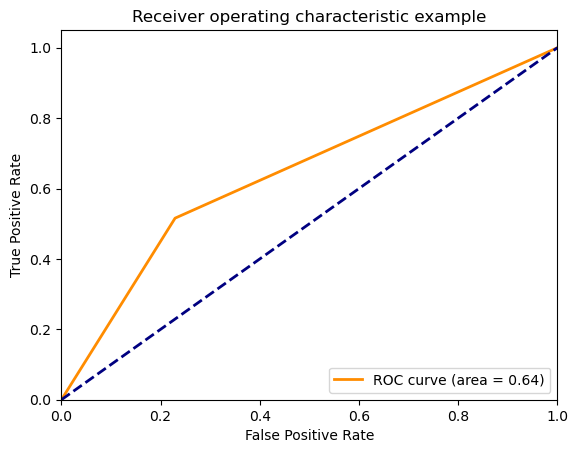

In [103]:
from sklearn.utils import class_weight
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Compute class weights
weights = class_weight.compute_sample_weight('balanced', y_train_arr)
class_weights = dict(enumerate(np.unique(weights)))

# Define the model
nnm = keras.models.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train_arr.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

# Adjust the learning rate
learning_rate = 0.001

# Compile the model with the adjusted learning rate
nnm.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Adjust the batch size and number of epochs
batch_size = 64
num_epochs = 50

# Train the model with the adjusted batch size and number of epochs, and class weights
nnm.fit(X_train_arr, y_train_arr, epochs=num_epochs, batch_size=batch_size, class_weight=class_weights)

# Make predictions
y_pred = nnm.predict(X_test_arr)
y_pred = [1 if p > 0.5 else 0 for p in y_pred]

# Evaluate the model
loss, accuracy = nnm.evaluate(X_test_arr, y_test_arr)
roc_auc = roc_auc_score(y_test_arr, y_pred)
print(f"Loss: {loss}, Accuracy: {accuracy}, ROC AUC: {roc_auc}")

# Print classification report
print(classification_report(y_test_arr, y_pred))

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_arr, y_pred)
roc_auc = roc_auc_score(y_test_arr, y_pred)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


### Interpretation of Neural Network with altered weights and adjusting learning rate, batch size and epochs
Compared to SMOTE with the same adjustments, altering the class weights with adjustments to learning rate, batch size, and epochs has resulted in a better performance in terms of loss, accuracy, ROC AUC, precision, recall, and F1 score. This model has achieved better balance in correctly identifying instances of both classes, as reflected in the higher recall for both classes and the significant improvement in precision and F1 score for Class 1.  The AUC at 0.65 remains moderate for discrimination.

## Ensemble Model (excludes Neural Network)
Will construct an ensemble model using the Decision Tree, Logistic Regression, and Random Forest Models.  All final models with SMOTE applied will be used for the ensemble model.

Confusion Matrix:
[[380 161]
 [ 13  82]]



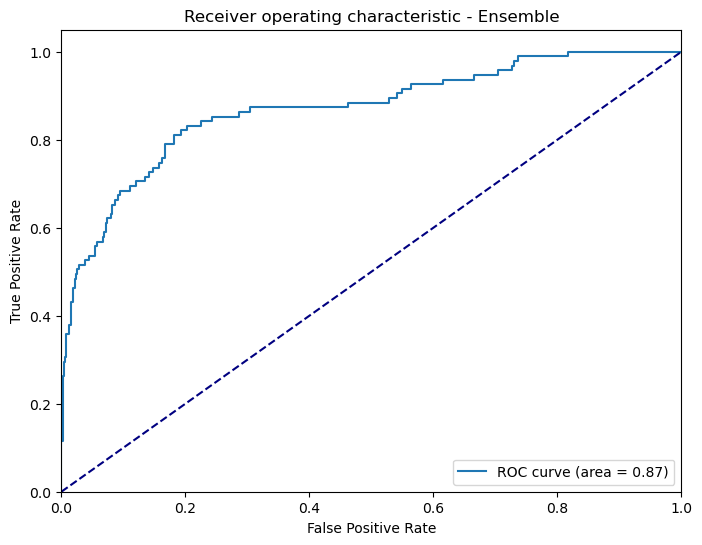

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       541
           1       0.28      0.52      0.37        95

    accuracy                           0.73       636
   macro avg       0.59      0.64      0.60       636
weighted avg       0.81      0.73      0.76       636

Ensemble Metrics: Accuracy = 0.7264150943396226, ROC AUC = 0.8694620099231443, F1 Score = 0.485207100591716


In [104]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score, f1_score
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt

def calculate_metrics_and_plot_roc(clf, X_test, y_test, model_name):
    # Calculate metrics
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred)
    
    # Print the confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{conf_mat}\n")
    
    # Plot ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    return accuracy, roc_auc, f1

# Create a list of our models
estimators = [('dtm', dtm), ('rfm', rfm), ('lrm', lrm)]

# Create our voting classifier
voting = VotingClassifier(estimators=estimators, voting='soft')  # soft voting - based on probabilities

# Fit model
voting.fit(X_train_res, y_train_res)

# Evaluate ensemble
ensemble_metrics = calculate_metrics_and_plot_roc(voting, X_test_arr, y_test_arr, 'Ensemble')

# Print classification report
print(classification_report(y_test_arr, y_pred))

print(f"Ensemble Metrics: Accuracy = {ensemble_metrics[0]}, ROC AUC = {ensemble_metrics[1]}, F1 Score = {ensemble_metrics[2]}")


## Interpretation of Ensemble:  
The ensemble model achieves an accuracy of 0.73, which is slightly lower than the neural network model's (with altered class weights and adjuting learning rate, batch size, and epochs) accuracy of 0.78. The ROC AUC for the ensemble model is 0.87, which is significantly higher than the neural network model's ROC AUC of 0.65. This suggests that the ensemble model performs better at distinguishing between positive and negative classes. The F1 Score for the ensemble model is 0.49, which is higher than the F1 scores for Class 1 in the neural network model (0.39) and suggests that the ensemble model has a better balance between precision and recall for Class 1.

## Recreate Ensemble with only Logistic Regression and Random Forest Models with SMOTE 
Will drop decision tree model to reduce risk of overfitting

Confusion Matrix:
[[424 117]
 [ 10  85]]



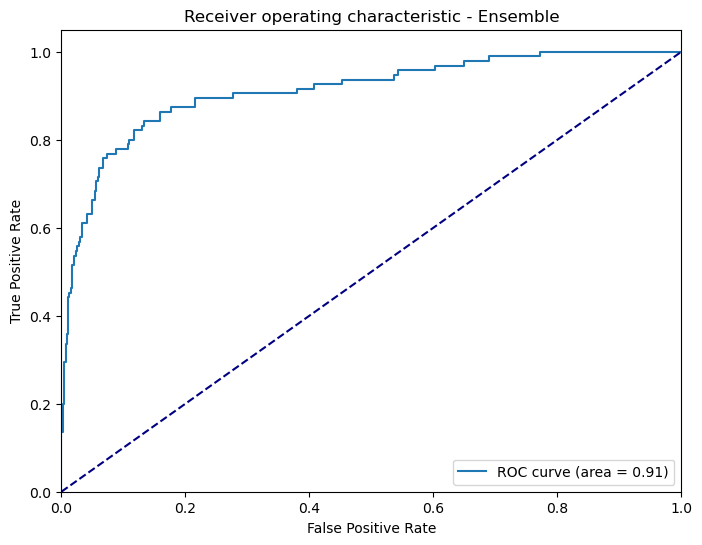

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       541
           1       0.42      0.89      0.57        95

    accuracy                           0.80       636
   macro avg       0.70      0.84      0.72       636
weighted avg       0.89      0.80      0.83       636

Ensemble Metrics: Accuracy = 0.800314465408805, ROC AUC = 0.9114116159159451, F1 Score = 0.5723905723905723


In [105]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score, f1_score
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt

def calculate_metrics_and_plot_roc(clf, X_test, y_test, model_name):
    # Calculate metrics
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred)
    
    # Print the confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{conf_mat}\n")
    
    # Plot ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    return accuracy, roc_auc, f1

# Create a list of our models
estimators = [('rfm', rfm), ('lrm', lrm)]  # removed 'dtm' from the list

# Create our voting classifier
voting = VotingClassifier(estimators=estimators, voting='soft')  # soft voting - based on probabilities

# Fit model
voting.fit(X_train_res, y_train_res)

# Evaluate ensemble
ensemble_metrics = calculate_metrics_and_plot_roc(voting, X_test_arr, y_test_arr, 'Ensemble')

# Print classification report
y_pred = voting.predict(X_test_arr)  # y_pred should be predicted by the ensemble model
print(classification_report(y_test_arr, y_pred))

print(f"Ensemble Metrics: Accuracy = {ensemble_metrics[0]}, ROC AUC = {ensemble_metrics[1]}, F1 Score = {ensemble_metrics[2]}")


### Interpretation of Ensemble with just logistic regression/SMOTE and Random Forest/SMOTE included.
This model has accuracy of 80%, better than full (all 3) ensemble.  It has the highest AUC of any model created thus far.  This indicates very good performance in distinguishing between positive and negative classes of coronary heart disease.  The F1 score as a measure of balance between precision and recall is also higher than our triple model.  This model also has high precision for class 0 and high recall for class 1.  It more reliably predicts 0 with no disease, and is better at identifying actual class 1 instances.  Thus far this is the best performing model.

# Summary 

The best performing models to result include the (1) Keras Sequential Model Neural Network, modified with altered class weights and using adjusting learning rates, batch sizes, and epochs and (2) the Ensemble model created from the Decision Tree with SMOTE, the Random Forest with SMOTE, and Logistic Regression with SMOTE, and (3) the Ensemble model with only Random Forest and Logist Regression, both with SMOTE. 

Based upon the performance metrics of precision, recall, F1 and AUC, the Ensemble Model with logistic regresion/SMOTE and random forest/SMOTE is the best choice.  This model has been tuned to focus on our goal of correctly identifying coronary heart disease instances.  This model is superior in this context as it is less likely to miss a positive instance of class '1',and it strikes a better balance between precision and recall for class '1' as measured by the F1 score, even though it might incorrectly classify some negative instances as positive. In cases where it is more important to correctly identify all positives, a higher number of false positives can be considered an acceptable trade-off.

#### Best Model:  Ensemble with logistic regression/SMOTE & random forest/SMOTE